Shape of one row data:
(1478, 400)
(400,)
[ 6.66234127e+005  2.79610421e+009  4.20498314e+005  2.41865377e+008
  3.04773698e+008  1.33246825e+006  3.86984603e+009  1.44713157e+005
  1.52386849e+008  8.73782565e+007  3.15695362e+003  7.43765123e+008
  7.89238406e+002  2.69118920e+007  7.42702503e+006  1.11976212e+002
  1.41202081e+008 -2.53392831e+001  4.20498438e+005  1.66558532e+005
 -6.13452378e+001  1.62521540e+007 -1.49352368e+003  1.66558594e+005
  3.26886598e+238  3.00489544e-307  9.37908771e-196 -3.73651724e-230
  3.44209773e+012 -2.60706991e-003 -4.09624439e+005  3.76807813e+005
 -4.09624312e+005  1.49925685e+000  7.69178751e-011 -2.48502969e+005
  3.33117063e+005 -6.44486124e+005  5.82961919e-001 -1.87593014e-001
 -3.27699551e+006  4.94857320e+003 -3.27699550e+006  1.01634578e-004
 -4.00119096e+001 -2.57794551e+006  5.05112576e+004 -5.15589100e+006
 -2.60707132e-003 -1.01357132e+002 -2.92747151e+006  1.44713156e+005
 -7.95209498e+006 -2.53392907e+001 -6.11259167e-005 -7.318678

/Users/antonvasilev/PyCharmProjects/emg-interface/venv/lib/python3.9/site-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Epoch 1/50
16/16 [==============================] - 6s 157ms/step - loss: 2.2860 - accuracy: 0.1015 - val_loss: 2.2172 - val_accuracy: 0.0991
Epoch 2/50
16/16 [==============================] - 2s 129ms/step - loss: 2.2372 - accuracy: 0.1083 - val_loss: 2.2484 - val_accuracy: 0.1104
Epoch 3/50
16/16 [==============================] - 2s 131ms/step - loss: 2.2197 - accuracy: 0.1296 - val_loss: 2.2414 - val_accuracy: 0.0698
Epoch 4/50
16/16 [==============================] - 2s 139ms/step - loss: 2.2096 - accuracy: 0.1373 - val_loss: 2.2151 - val_accuracy: 0.1284
Epoch 5/50
16/16 [==============================] - 2s 127ms/step - loss: 2.2034 - accuracy: 0.1093 - val_loss: 2.2107 - val_accuracy: 0.0991
Epoch 6/50
16/16 [==============================] - 2s 141ms/step - loss: 2.2047 - accuracy: 0.1103 - val_loss: 2.2123 - val_accuracy: 0.0833
Epoch 7/50
16/16 [==============================] - 2s 137ms/step - loss: 2.2008 - accuracy: 0.1267 - val_loss: 2.2083 - val_accuracy: 0.0833
Epoch 

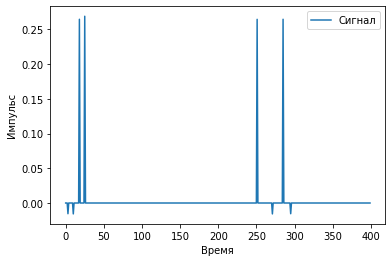

In [43]:

from src.data_manager.rflab_np_manager import RflabNpDataManager
import numpy as np
from keras.utils import to_categorical
from keras import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, BatchNormalization, LSTM, Conv1D, Reshape, Dropout
from keras.datasets import imdb
from keras.utils import pad_sequences
import matplotlib.pyplot as plt

np.random.seed(42)

np.set_printoptions(suppress=True)


rflab_manager = RflabNpDataManager()
dataset = rflab_manager.load()

X_train = dataset[2:, 0:-1]
X_train[np.isnan(X_train)] = 0.
print('Shape of one row data:')
print(X_train.shape)
print(X_train[0].shape)
print(X_train[0])
# X_train = np.reshape(X_train, (X_train.shape[0], 400, 1))
print('ReShape of one row data:')
print(X_train.shape)
print(X_train[0].shape)
print(X_train[0])

print('before nornalize')
print(X_train[0])
row_sums = X_train.sum(axis=1)
X_train = X_train / row_sums[:, np.newaxis]
print('after nornalize')
print(X_train[0])

Y_train = dataset[2:, -1]
print('Class labels:')
print(np.unique(Y_train))

# Convert labels to categorical one-hot encoding
one_hot_labels = to_categorical(Y_train, num_classes=9)
print(one_hot_labels.shape)
print(np.unique(one_hot_labels))

model = Sequential()
num_classes = 9
time_series = X_train.shape[1]
model.add(Reshape((400, 1), input_shape=(400,)))
model.add(SimpleRNN(64, input_shape=(None, 400, 1), return_sequences=True))
model.add(SimpleRNN(8))
# model.add(Dense(1024, input_dim=400, activation='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.1))
# model.add(BatchNormalization())
# model.add(Dense(256, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.1))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
# Train the model, iterating on the data in batches of 32 samples
model.fit(X_train, one_hot_labels, epochs=50, batch_size=65, validation_split=0.3)
y_pred = model.predict(X_train[0:1])
# print(X_train[0:1])
# print('X_pred')
# print(X_train[0:1])
print('y_pred')
print(y_pred)

plt.plot(X_train[140],
         label='Сигнал')
plt.xlabel('Время')
plt.ylabel('Импульс')
plt.legend()
plt.savefig('emg_example.png')

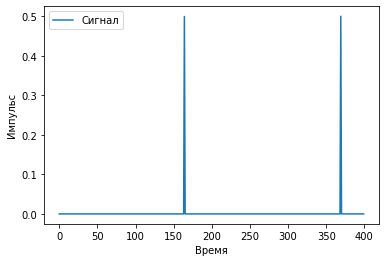

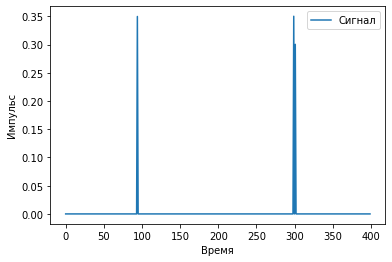

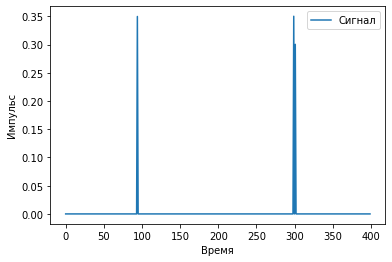

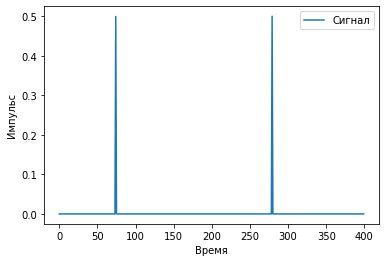

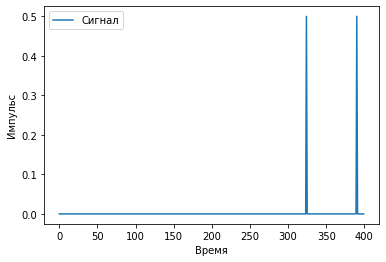

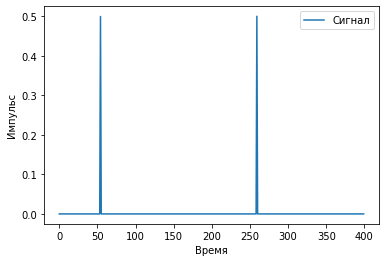

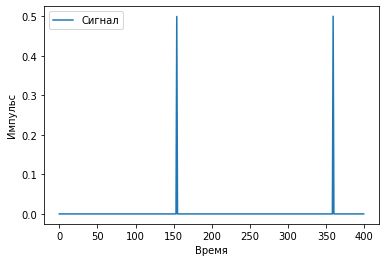

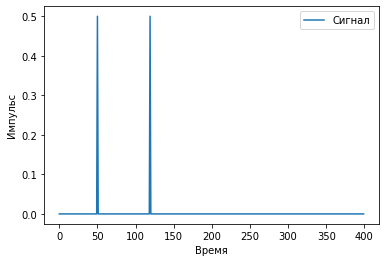

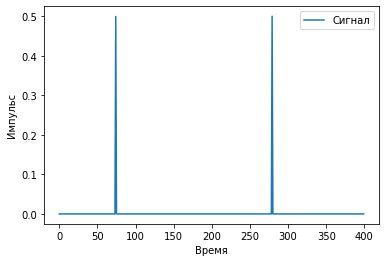

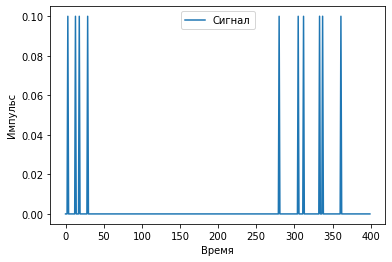

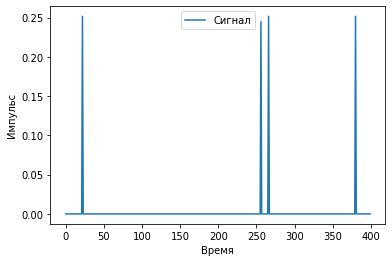

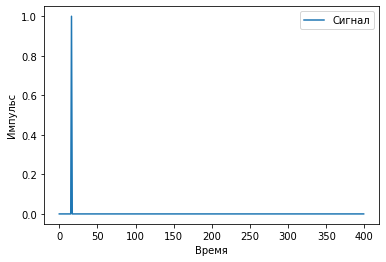

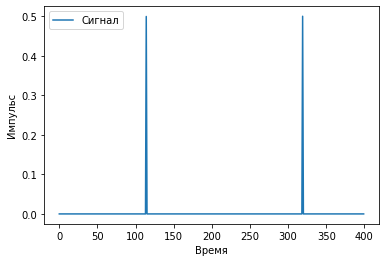

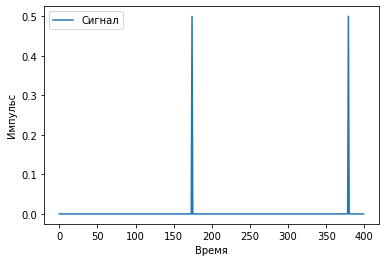

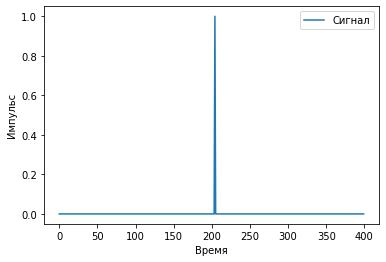

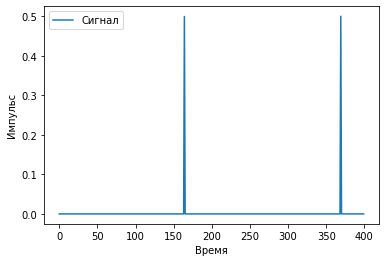

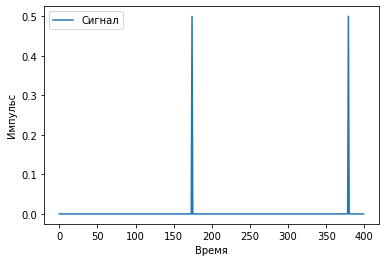

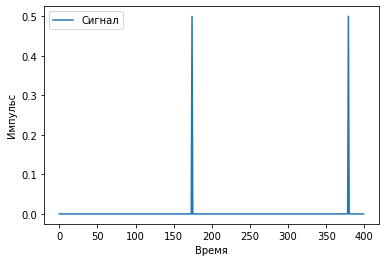

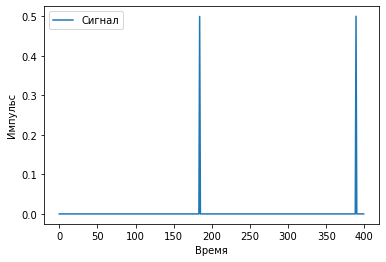

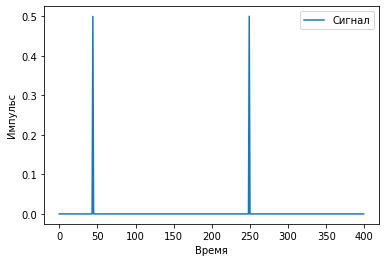

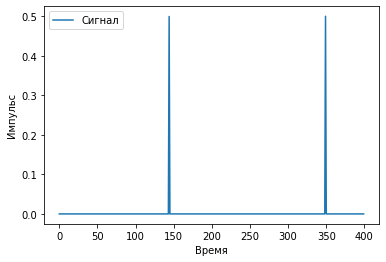

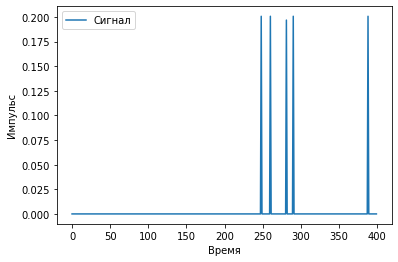

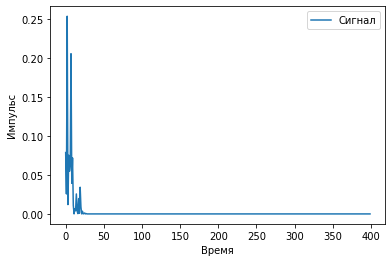

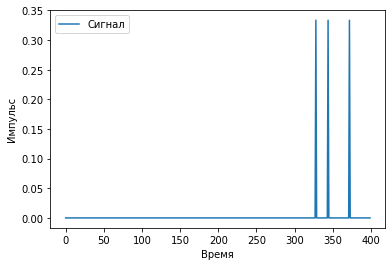

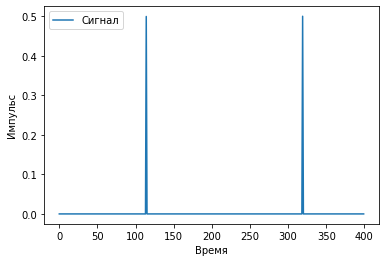

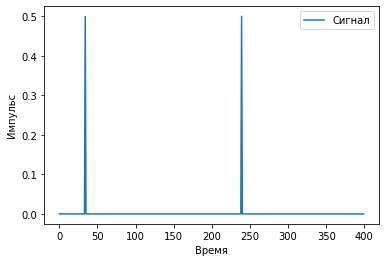

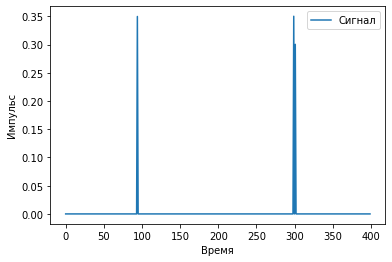

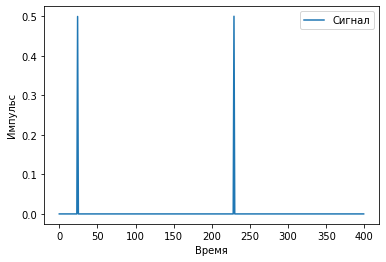

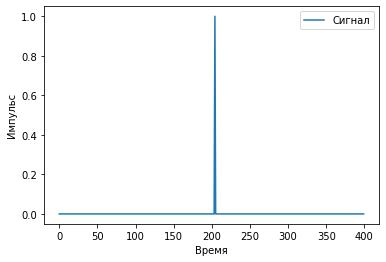

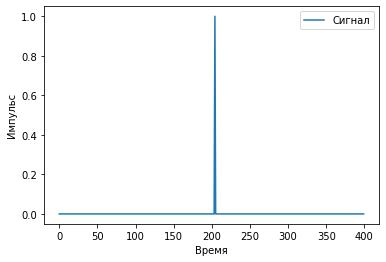

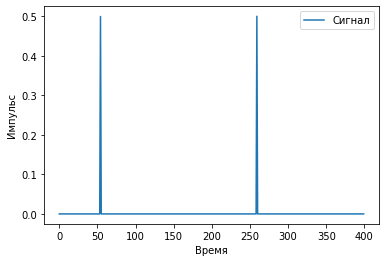

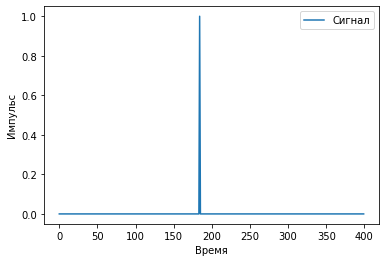

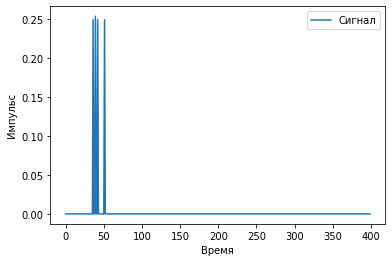

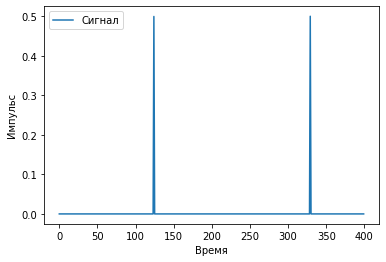

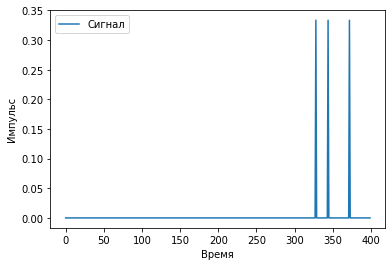

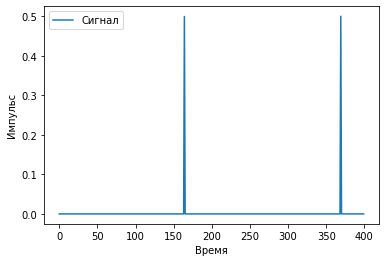

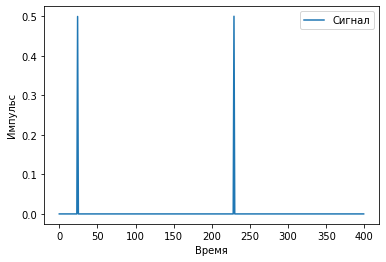

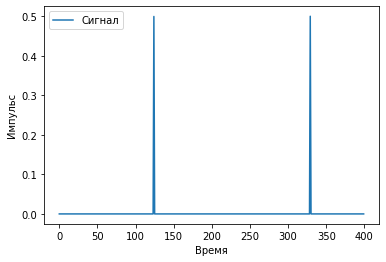

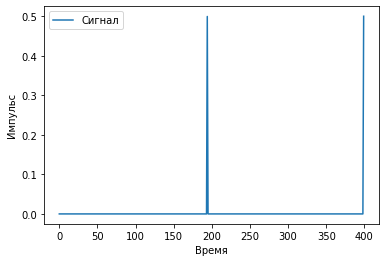

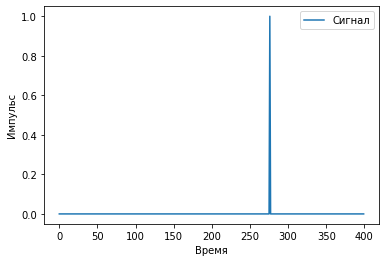

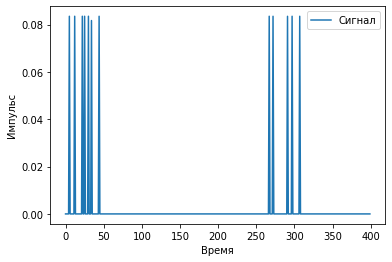

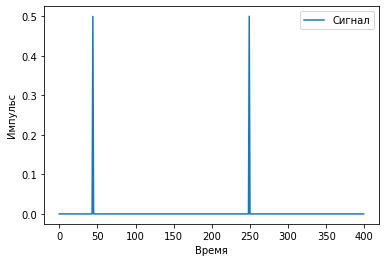

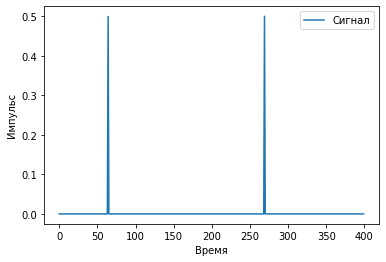

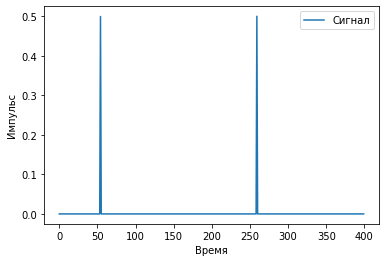

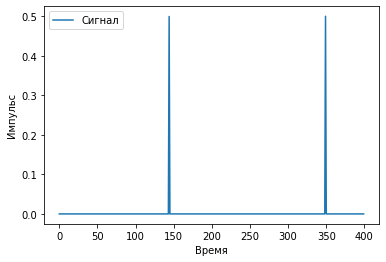

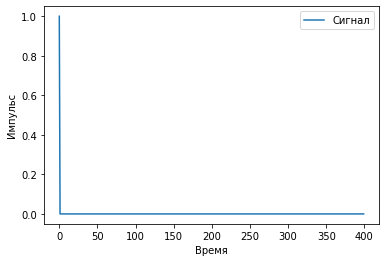

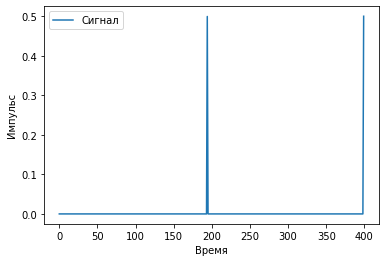

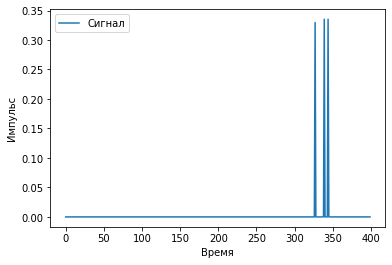

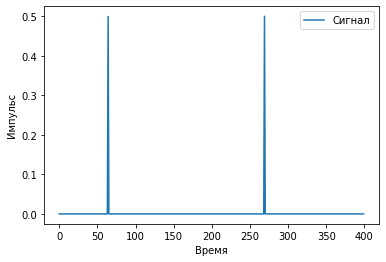

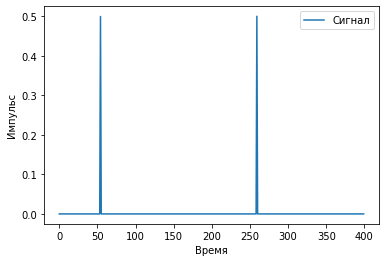

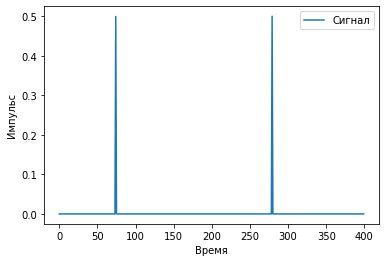

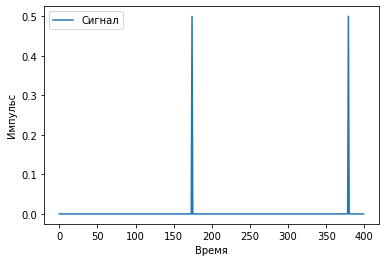

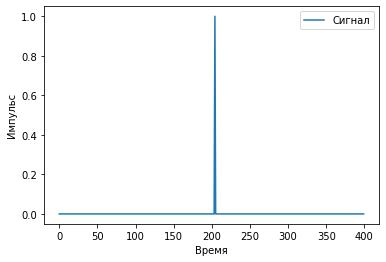

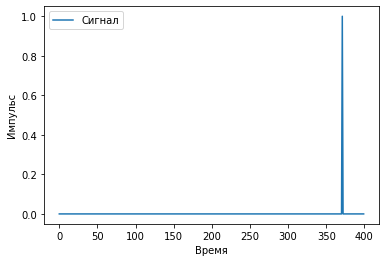

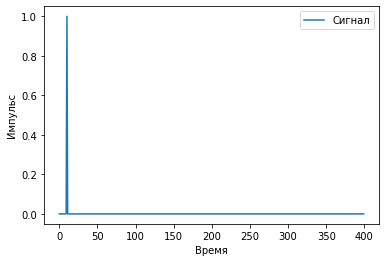

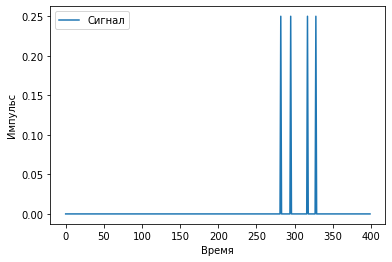

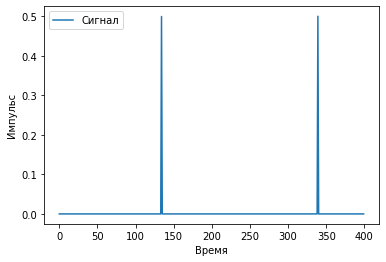

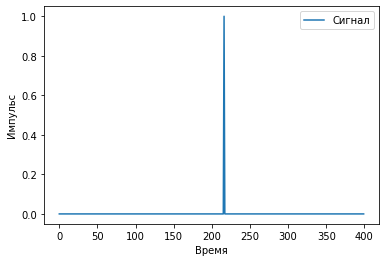

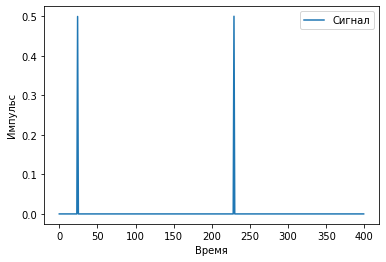

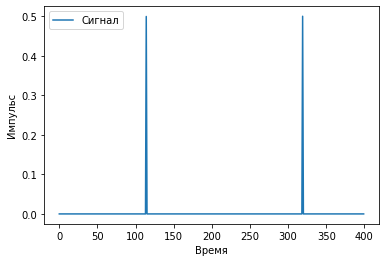

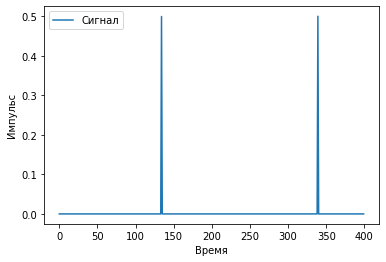

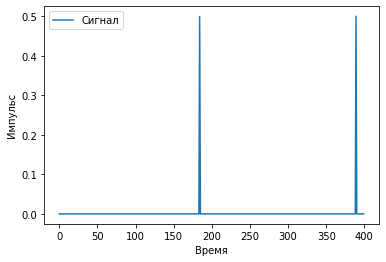

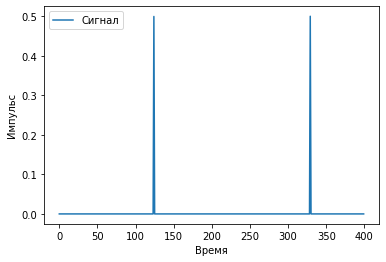

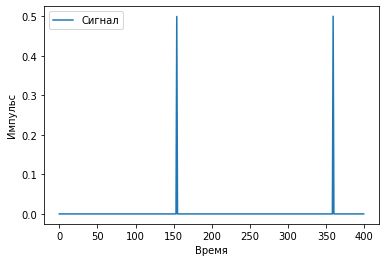

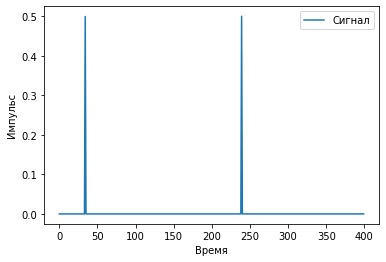

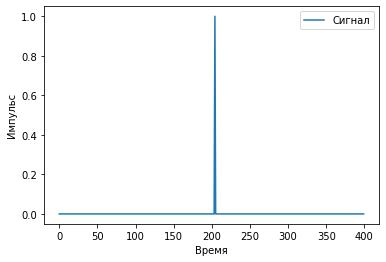

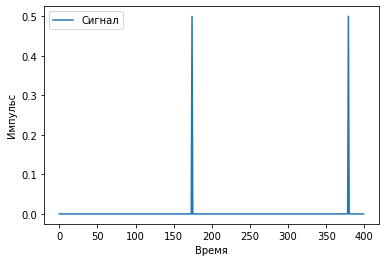

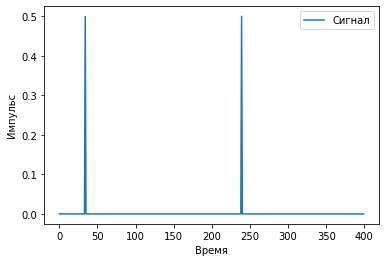

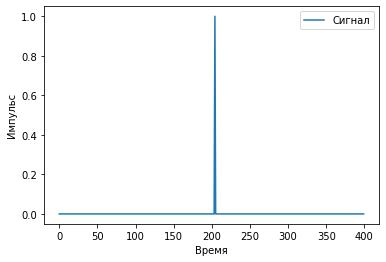

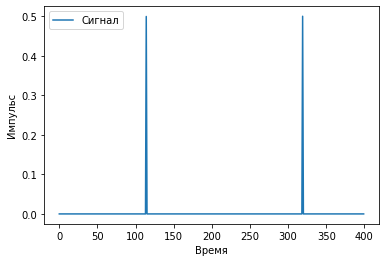

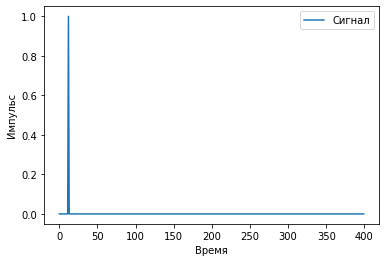

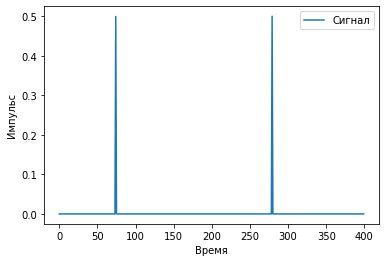

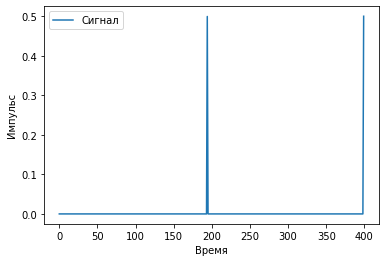

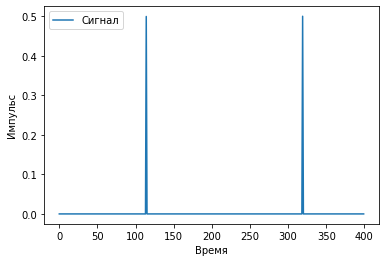

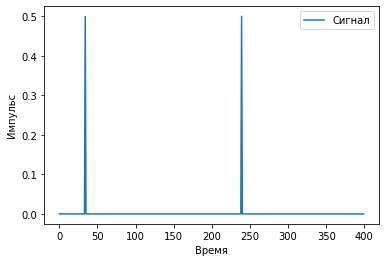

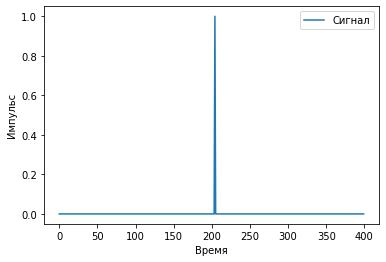

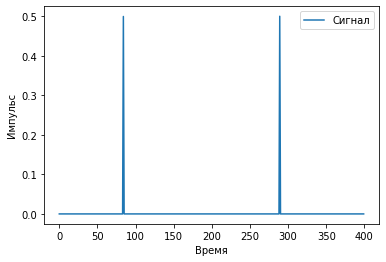

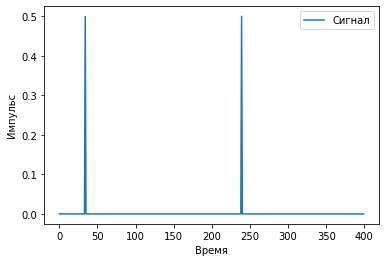

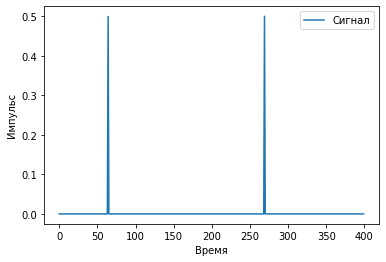

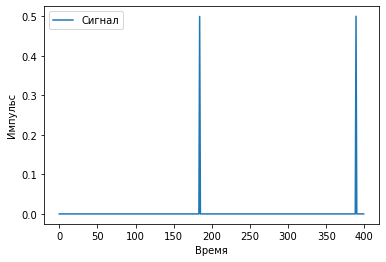

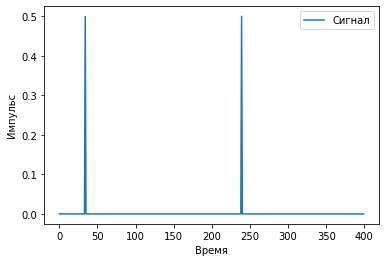

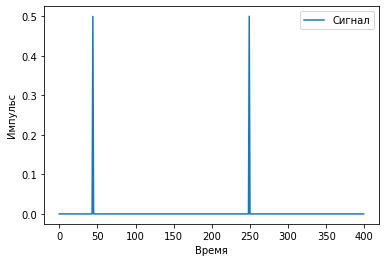

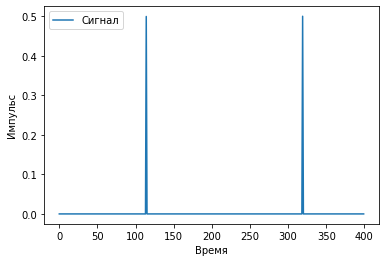

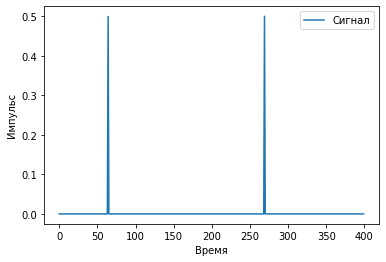

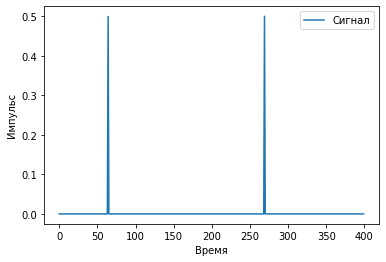

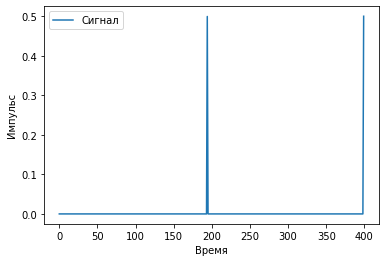

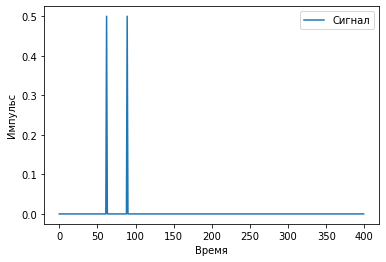

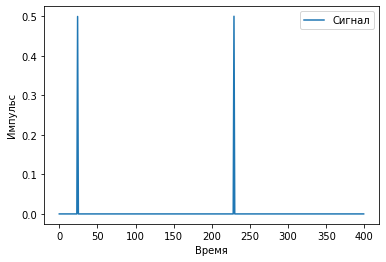

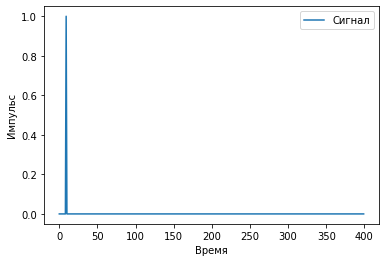

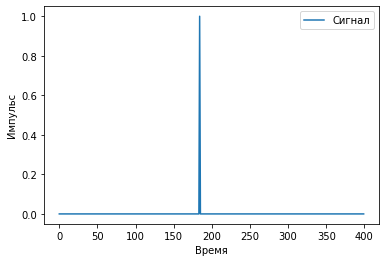

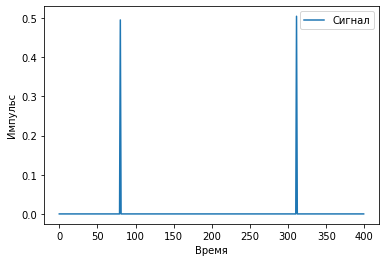

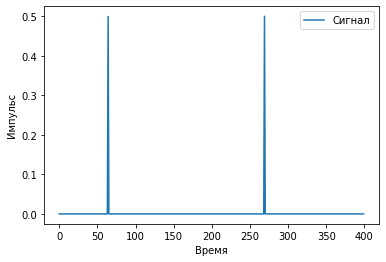

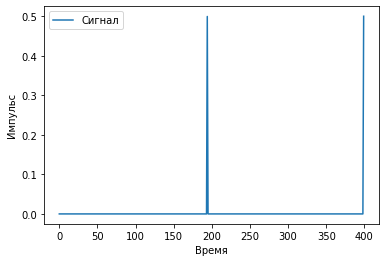

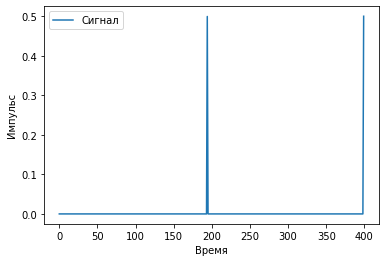

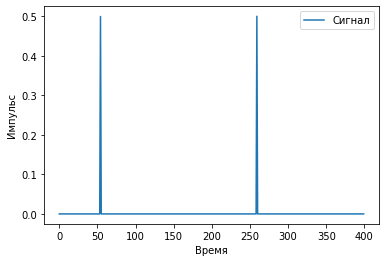

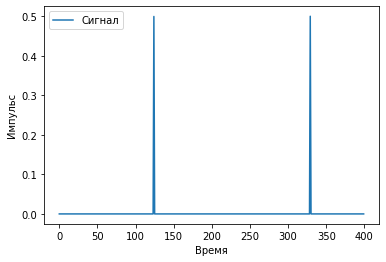

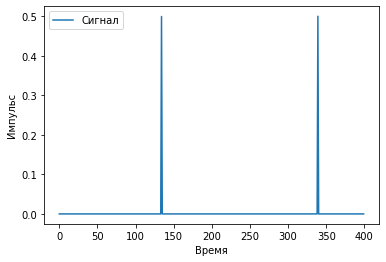

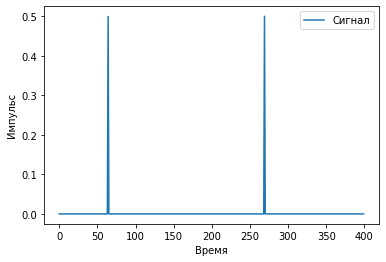

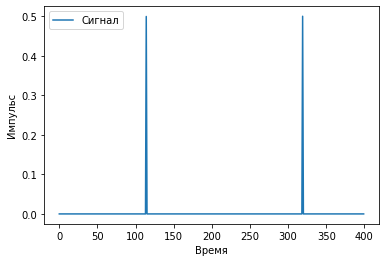

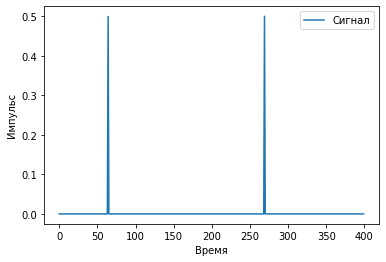

In [45]:
%matplotlib inline

idx = np.random.randint(0, X_train.shape[0], size=100)
for X_i in X_train[idx,:]:
    plt.plot(X_i.reshape(400),
             label='Сигнал')
    plt.xlabel('Время')
    plt.ylabel('Импульс')
    plt.legend()
    plt.show()

In [46]:
from scipy import signal
import pickle
import sys
import os
from random import shuffle
    
from scipy import signal


def filter_signal(x):
    N = 10
    Fc = 40
    Fs = 1600
    h = signal.firwin(numtaps=N, cutoff=Fc, nyq=Fs / 2)
    y = signal.lfilter(h, 1.0, x)
    return y

path = "/Users/antonvasilev/PyCharmProjects/emg-interface/nine_movs_six_sub_split/"

# path where you want to save trained model and some other files
sec_path = "./"
persons = [1, 2, 3, 4, 5, 6]

def create_dataset(file_path, persons, moves=None):
    if (moves is None):
        moves = [0, 1, 2, 3, 4, 5, 6, 7, 8]
    
    path = file_path + "{}_{}.pickle"
    sgn = []
    lbl = []
    for i in persons:
        for j in moves:
            with open(path.format(i, j + 1), "rb") as fp:  # Unpickling
                data = pickle.load(fp)

            for k in range(np.shape(data)[0]):
                sgn.append(data[k])
                lbl.append(j)

    sgn = np.asarray(sgn, dtype=np.float32)
    lbl = np.asarray(lbl, dtype=np.int32)

    c = list(zip(sgn, lbl))
    shuffle(c)
    sgn, lbl = zip(*c)

    sgn = np.asarray(sgn, dtype=np.float64)
    lbl = np.asarray(lbl, dtype=np.int64)

    print(sgn.shape)

    train_signals = sgn[0:int(0.8 * len(sgn))]
    train_labels = lbl[0:int(0.8 * len(lbl))]
    val_signals = sgn[int(0.8 * len(sgn)):]
    val_labels = lbl[int(0.8 * len(lbl)):]
    # test_signals = sgn[int(0.8*len(sgn)):]
    # test_labels = lbl[int(0.8*len(lbl)):]

    train_labels = to_categorical(train_labels)
    val_labels = to_categorical(val_labels)
    # test_labels = to_categorical(test_labels)

    return train_signals, train_labels, val_signals, val_labels

# only two hand moves take in dataset
moves = [0, 1] # Hand up, hand down
# moves = None # All movements

(X_train2,train_labels,__,___ ) = create_dataset(path, persons, moves)

(593, 400)


In [47]:
from keras.utils import to_categorical
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pickle
from scipy import signal
from random import shuffle


def _filter_signal(x):
    N = 10
    Fc = 40
    Fs = 1600
    h = signal.firwin(numtaps=N, cutoff=Fc, nyq=Fs / 2)
    y = signal.lfilter(h, 1.0, x)
    return y


def _filter_hz(X):
    """
    Filter the 50 hz noize
    :param X: numpy dataset
    :return:
    """
    X_train_filtered = []
    for X in X:
        X_train_filtered.append(_filter_signal(X))
    X_train_filtered = np.array(X_train_filtered)

    return X_train_filtered


def _filter_avg(X):
    # Moving Average Filter (SMA)
    X_train_filtered_sma0 = []
    for i0 in range(0, X.shape[0]):
        X_train_filtered_sma = []
        last_index = X[i0].shape[0]

        N = 20
        N_half = int(N / 2)

        for i in range(0, last_index):
            X_average = 0
            X_i = X[i0]
            if i >= N_half and i <= last_index - N_half:
                for j in range(i - N_half, i + N_half):
                    X_average += X_i[j]
                X_average /= N
            elif i < N_half:
                for j in range(0, i + N_half):
                    #                 print('+=')
                    #                 print(X_train_scaled[i0][j])
                    X_average += X_i[j]
                X_average /= (i + N_half)
            else:
                for j in range(i - N_half, last_index):
                    X_average += X_i[j]
                X_average /= (last_index - i + N_half)
            #     print('scaled')
            #     print(X_train_scaled[i])
            #     print('average')
            #     print(X_average)
            X_train_filtered_sma.append(X_average)

        #     plt.plot(X_train_scaled[i0],
        #              label='Сигнал scaled ' + str(np.argmax(train_labels[i]) + 1))
        #     plt.xlabel('Время')
        #     plt.ylabel('Импульс')
        #     plt.legend()
        #     plt.show()

        #     plt.plot(X_train_filtered_sma,
        #              label='Сигнал avg ' + str(np.argmax(train_labels[i]) + 1))
        #     plt.xlabel('Время')
        #     plt.ylabel('Импульс')
        #     plt.legend()
        #     plt.show()
        #     break
        X_train_filtered_sma0.append(X_train_filtered_sma)

    return X_train_filtered_sma0


def _scale(X):
    """
    Scale data
    :param X:
    :return:
    """

#     X_min =  np.min(X)
#     X_max = np.max(X)
#     print("max: {0}, min: {1}".format(X_max, X_min))
#     X = (X - X_min)/(X_max - X_min)
#     return X
#     scaler = MinMaxScaler()
    scaler = StandardScaler()
    # transform data
    X_train_scaled = scaler.fit_transform(np.array(X))

    return X_train_scaled


def normalize(X):
    X = _filter_hz(X)
    X = _filter_avg(X)
    X = _scale(X)
    return X



def create_dataset(file_path, persons, moves=None):
    """
    Create dataset with 9 movements (indexes: 0 - 8)
    and 6 person (indexes: 1 - 6)
    :param file_path:
    :param persons:
    :param moves:
    :return:
    """
    if (moves is None):
        moves = [0, 1, 2, 3, 4, 5, 6, 7, 8]

    # /Users/antonvasilev/PyCharmProjects/emg-interface/nine_movs_six_sub_split/1_1.pickle
    if file_path[-1] != '/':
        file_path += '/'
    path = file_path + "{}_{}.txt"
    sgn = []
    lbl = []
    for i in persons:
        for j in moves:
            with open(path.format(i, j + 1), "rb") as fp:  # Unpickling
                data = pickle.load(fp)

            for k in range(np.shape(data)[0]):
                sgn.append(data[k])
                lbl.append(j)

    sgn = np.asarray(sgn, dtype=np.float32)
    lbl = np.asarray(lbl, dtype=np.int32)

    c = list(zip(sgn, lbl))
    shuffle(c)
    sgn, lbl = zip(*c)

    sgn = np.asarray(sgn, dtype=np.float64)
    lbl = np.asarray(lbl, dtype=np.int64)

    print(sgn.shape)

    train_signals = sgn[0:int(0.8 * len(sgn))]
    train_labels = lbl[0:int(0.8 * len(lbl))]
    val_signals = sgn[int(0.8 * len(sgn)):]
    val_labels = lbl[int(0.8 * len(lbl)):]
    # test_signals = sgn[int(0.8*len(sgn)):]
    # test_labels = lbl[int(0.8*len(lbl)):]

    train_labels = to_categorical(train_labels)
    val_labels = to_categorical(val_labels)
    # test_labels = to_categorical(test_labels)

    return train_signals, train_labels, val_signals, val_labels


(474, 400)
(474, 2)


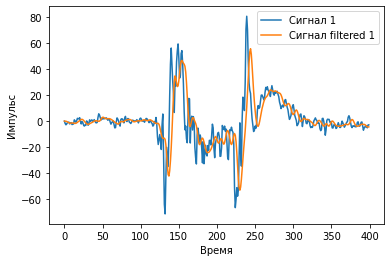

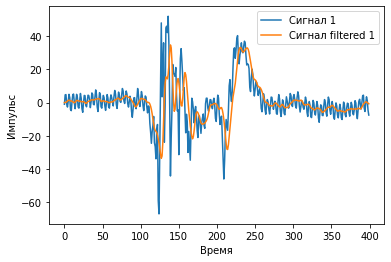

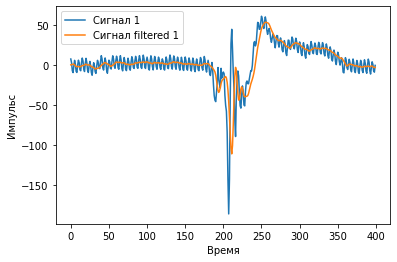

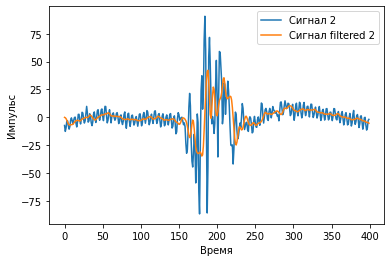

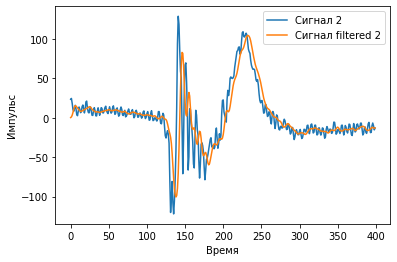

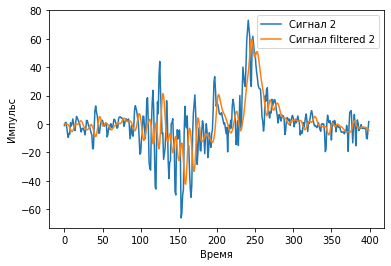

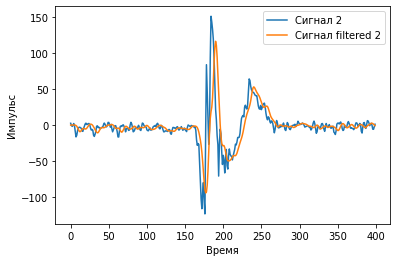

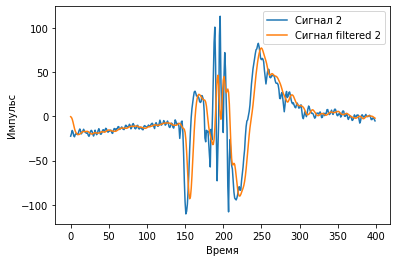

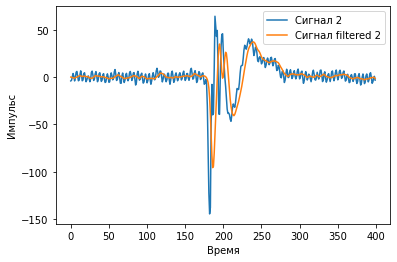

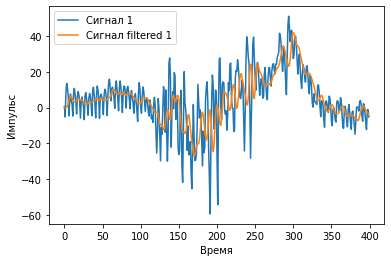

In [48]:
X_train2 = np.array(X_train2)
print(X_train2.shape)
print(train_labels.shape)
idx = np.random.randint(0, X_train2.shape[0], size=10)
X_train_filtered = []
for X in X_train2:
    X_train_filtered.append(filter_signal(X))
X_train_filtered = np.array(X_train_filtered)

for i in idx:
    X_i = X_train2[i]
    plt.plot(X_i,
             label='Сигнал ' + str(np.argmax(train_labels[i]) + 1))
    plt.plot(X_train_filtered[i],
             label='Сигнал filtered ' + str(np.argmax(train_labels[i]) + 1))
    plt.xlabel('Время')
    plt.ylabel('Импульс')
    plt.legend()
    plt.show()


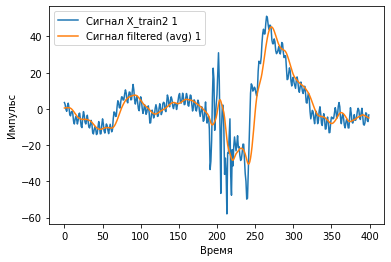

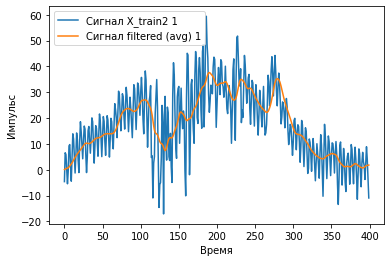

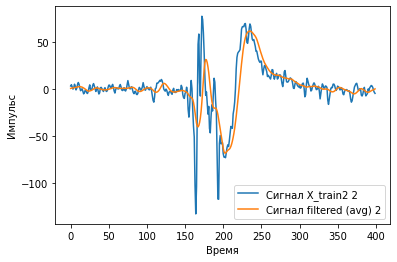

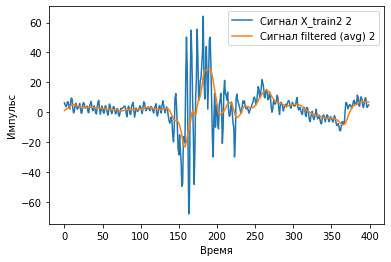

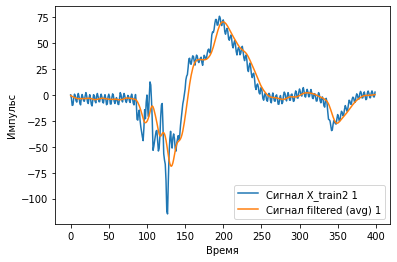

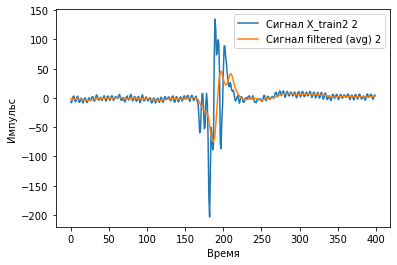

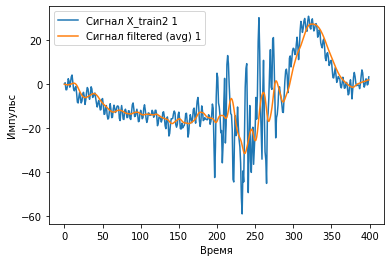

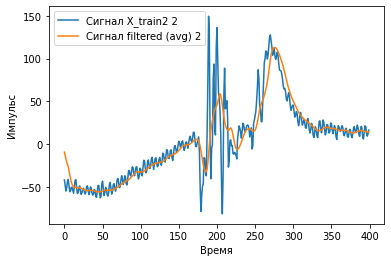

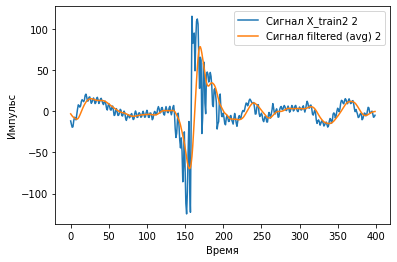

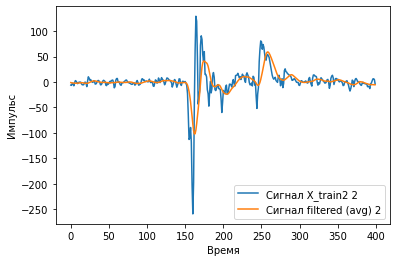

In [50]:
# Moving Average Filter (SMA)
X_train_filtered_sma0 = []
for i0 in range(0, X_train_filtered.shape[0]):
    X_train_filtered_sma = []
    last_index = X_train_filtered[i0].shape[0]

    N = 10
    N_half = int(N / 2)

    for i in range(0, last_index):
        X_average = 0
        X = X_train_filtered[i0]
        if i >= N_half and i <= last_index - N_half:
            for j in range(i - N_half, i + N_half):
                X_average += X[j]
            X_average /= N
        elif i < N_half:
            for j in range(0, i + N_half):
#                 print('+=')
#                 print(X_train_scaled[i0][j])
                X_average += X[j]
            X_average /= (i + N_half)
        else:
            for j in range(i - N_half, last_index):
                X_average += X[j]
            X_average /= (last_index - i + N_half)
    #     print('scaled')
    #     print(X_train_scaled[i])
    #     print('average')
    #     print(X_average)
        X_train_filtered_sma.append(X_average)

#     plt.plot(X_train_scaled[i0],
#              label='Сигнал scaled ' + str(np.argmax(train_labels[i]) + 1))
#     plt.xlabel('Время')
#     plt.ylabel('Импульс')
#     plt.legend()
#     plt.show()


#     plt.plot(X_train_filtered_sma,
#              label='Сигнал avg ' + str(np.argmax(train_labels[i]) + 1))
#     plt.xlabel('Время')
#     plt.ylabel('Импульс')
#     plt.legend()
#     plt.show()
#     break
    X_train_filtered_sma0.append(X_train_filtered_sma)

idx = np.random.randint(0, X_train2.shape[0], size=10)
for i in idx:
    X_i = X_train2[i]
    plt.plot(X_i,
             label='Сигнал X_train2 ' + str(np.argmax(train_labels[i]) + 1))
    plt.xlabel('Время')
    plt.ylabel('Импульс')
    
    plt.plot(X_train_filtered_sma0[i],
             label='Сигнал filtered (avg) ' + str(np.argmax(train_labels[i]) + 1))
    plt.xlabel('Время')
    plt.ylabel('Импульс')
    plt.legend()
    plt.show()

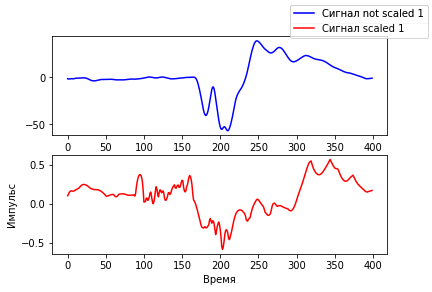

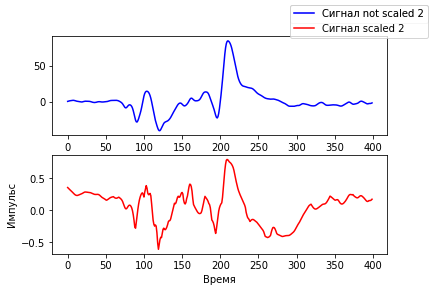

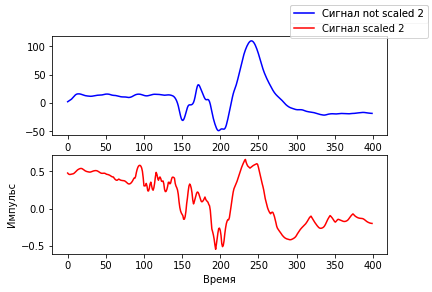

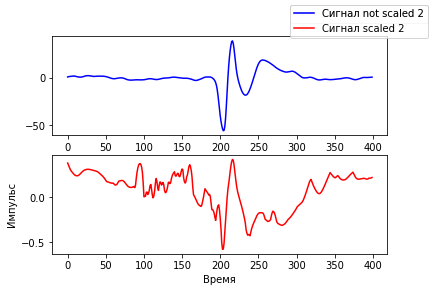

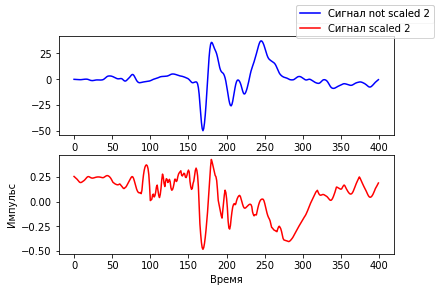

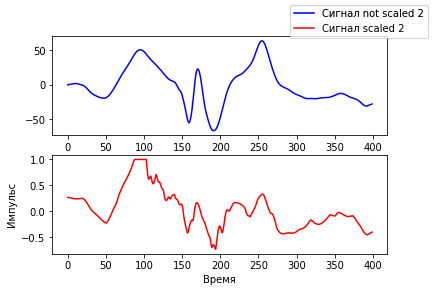

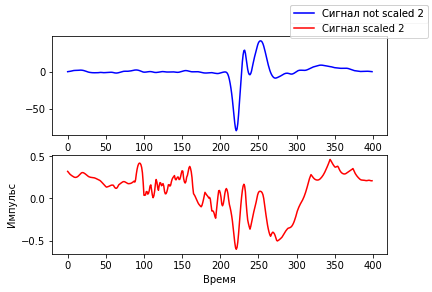

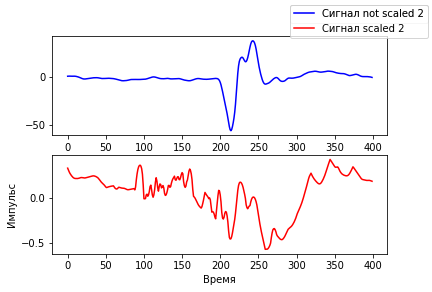

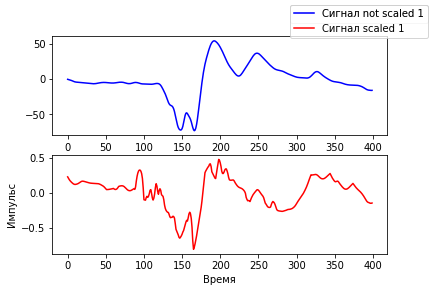

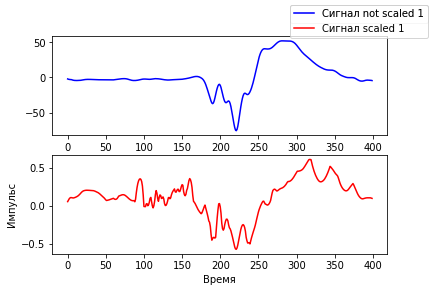

In [63]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler

idx = np.random.randint(0, X_train2.shape[0], size=10)

# scaler = StandardScaler()
# scaler = MinMaxScaler()
scaler = MinMaxScaler(feature_range = (-1,1))
# transform data
X_train_scaled = scaler.fit_transform(np.array(X_train_filtered_sma0))
# print(scaled)

for i in idx:
    X_i = X_train_filtered_sma0[i]
    
    fig, axs = plt.subplots(2)
    axs[0].plot(X_i, 'b',
             label='Сигнал not scaled ' + str(np.argmax(train_labels[i]) + 1))
    
    fig.legend()
    axs[1].plot(X_train_scaled[i], 'r',
             label='Сигнал scaled ' + str(np.argmax(train_labels[i]) + 1))
    plt.xlabel('Время')
    plt.ylabel('Импульс')
    fig.legend()
    plt.show()
    



In [64]:
EPOCH_COUNT = 250

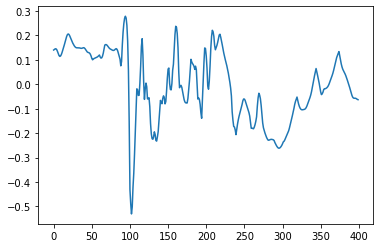

In [68]:
from keras.optimizers import Adam
from keras.layers import TimeDistributed, Flatten

def build_dense_model(input_size, num_sensors, num_classes):
    """
    Simple Dense model
    """
    model = Sequential()
    # FFNN
    model.add(Dense(256, input_dim=400, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add((Dense(32, activation='relu')))
    model.add(Dropout(0.2))
    model.add((Dense(32, activation='relu')))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(num_classes, activation='softmax'))


    opt = Adam(learning_rate=0.01)

    model.compile(loss='categorical_crossentropy',
                  optimizer=opt, metrics=['accuracy'])
    
    return model
    
def dense_fit(X_train_res, Y_train_res):
    # Model dense
    # X_train_res = X_train
    # Y_train_res = one_hot_labels
    X_train_res = X_train_scaled # X_train_filtered # X_train2
    Y_train_res = train_labels

    # filtration

    # row_sums = X_train_res.sum(axis=1)
    # X_train_res = X_train_res / row_sums[:, np.newaxis]

    num_classes = Y_train_res.shape[1]
    time_series = X_train_res.shape[1]

    model_ffnn = build_dense_model(time_series, 1, num_classes)
    model_ffnn.summary()
    # Train the model, iterating on the data in batches of 32 samples
    history_ffnn = model_ffnn.fit(X_train_res, Y_train_res, epochs=EPOCH_COUNT, batch_size=100, validation_split=0.3)
    
    return model_ffnn, history_ffnn

# model_ffnn, history_ffnn = dense_fit(X_train_res, Y_train_res)
plt.plot(X_train_scaled[0])
plt.show()


In [70]:
# Conv1D
from keras.layers import Conv1D
from keras.optimizers import Adam
from keras.layers import TimeDistributed, Flatten, GlobalAveragePooling1D, MaxPooling1D
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Model dense
# X_train_res = X_train
# Y_train_res = one_hot_labels
X_train_res = X_train_scaled # X_train_filtered # X_train2
Y_train_res = train_labels

def build_conv1d_model(input_size, num_sensors, num_classes):
    """
    Conv 1D model
    """
    
    model = Sequential()
    # Conv1d
    model.add(Reshape((input_size, num_sensors), input_shape=(input_size,)))
    model.add(Conv1D(25, 80, activation='relu', input_shape=(input_size, num_sensors)))
    model.add(Conv1D(25, 6, activation='relu'))
    model.add(MaxPooling1D(3))
    model.add(Conv1D(16, 6, activation='relu'))
    model.add(Conv1D(12, 4, activation='relu'))
    model.add(GlobalAveragePooling1D())
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))



    opt = Adam(learning_rate=0.01)

    model.compile(loss='categorical_crossentropy',
                  optimizer=opt, metrics=['accuracy'])
    
    return model

def conv1d_fit(X_train_res, Y_train_res):
    num_classes = Y_train_res.shape[1]
    time_series = X_train_res.shape[1]
    num_sensors = 1

    model_conv1 = build_conv1d_model(time_series, num_sensors, num_classes)

    # The EarlyStopping callback monitors training accuracy:
    # if it fails to improve for two consecutive epochs,
    # training stops early
    callbacks_list = [
        ModelCheckpoint(
            filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
            monitor='val_loss', save_best_only=True),
        EarlyStopping(monitor='accuracy', patience=1)
    ]

    # Train the model, iterating on the data in batches of 32 samples
    history_conv1 = model_conv1.fit(X_train_res, Y_train_res, epochs=EPOCH_COUNT, batch_size=100, validation_split=0.3
    #                                 , callbacks=callbacks_list
                                   )
    
    return model_conv1, history_conv1


model_conv1, history_conv1 = conv1d_fit(X_train_scaled, Y_train_res)


Epoch 1/250
4/4 [==============================] - 1s 123ms/step - loss: 0.6951 - accuracy: 0.5015 - val_loss: 0.6830 - val_accuracy: 0.5245
Epoch 2/250
4/4 [==============================] - 0s 48ms/step - loss: 0.6783 - accuracy: 0.5529 - val_loss: 0.6681 - val_accuracy: 0.5245
Epoch 3/250
4/4 [==============================] - 0s 49ms/step - loss: 0.6653 - accuracy: 0.5559 - val_loss: 0.6409 - val_accuracy: 0.6294
Epoch 4/250
4/4 [==============================] - 0s 47ms/step - loss: 0.6369 - accuracy: 0.6193 - val_loss: 0.5890 - val_accuracy: 0.6294
Epoch 5/250
4/4 [==============================] - 0s 51ms/step - loss: 0.5942 - accuracy: 0.7160 - val_loss: 0.5412 - val_accuracy: 0.7413
Epoch 6/250
4/4 [==============================] - 0s 44ms/step - loss: 0.5400 - accuracy: 0.7613 - val_loss: 0.5588 - val_accuracy: 0.6643
Epoch 7/250
4/4 [==============================] - 0s 45ms/step - loss: 0.5243 - accuracy: 0.7523 - val_loss: 0.5203 - val_accuracy: 0.7133
Epoch 8/250
4/4 [==

4/4 [==============================] - 0s 53ms/step - loss: 0.2940 - accuracy: 0.9094 - val_loss: 0.4075 - val_accuracy: 0.8531
Epoch 60/250
4/4 [==============================] - 0s 46ms/step - loss: 0.2472 - accuracy: 0.9063 - val_loss: 0.4330 - val_accuracy: 0.8182
Epoch 61/250
4/4 [==============================] - 0s 45ms/step - loss: 0.2583 - accuracy: 0.9094 - val_loss: 0.4356 - val_accuracy: 0.8252
Epoch 62/250
4/4 [==============================] - 0s 47ms/step - loss: 0.2473 - accuracy: 0.9275 - val_loss: 0.4088 - val_accuracy: 0.8252
Epoch 63/250
4/4 [==============================] - 0s 60ms/step - loss: 0.2353 - accuracy: 0.9275 - val_loss: 0.5323 - val_accuracy: 0.8322
Epoch 64/250
4/4 [==============================] - 0s 46ms/step - loss: 0.2458 - accuracy: 0.9124 - val_loss: 0.4818 - val_accuracy: 0.8322
Epoch 65/250
4/4 [==============================] - 0s 48ms/step - loss: 0.2423 - accuracy: 0.9063 - val_loss: 0.5348 - val_accuracy: 0.8112
Epoch 66/250
4/4 [========

4/4 [==============================] - 0s 45ms/step - loss: 0.1220 - accuracy: 0.9607 - val_loss: 1.5047 - val_accuracy: 0.8042
Epoch 118/250
4/4 [==============================] - 0s 45ms/step - loss: 0.1693 - accuracy: 0.9577 - val_loss: 0.8481 - val_accuracy: 0.8392
Epoch 119/250
4/4 [==============================] - 0s 43ms/step - loss: 0.1449 - accuracy: 0.9517 - val_loss: 1.0162 - val_accuracy: 0.8322
Epoch 120/250
4/4 [==============================] - 0s 47ms/step - loss: 0.1527 - accuracy: 0.9517 - val_loss: 1.2532 - val_accuracy: 0.7972
Epoch 121/250
4/4 [==============================] - 0s 45ms/step - loss: 0.2173 - accuracy: 0.9215 - val_loss: 0.9306 - val_accuracy: 0.7692
Epoch 122/250
4/4 [==============================] - 0s 39ms/step - loss: 0.1912 - accuracy: 0.9366 - val_loss: 0.7021 - val_accuracy: 0.8182
Epoch 123/250
4/4 [==============================] - 0s 42ms/step - loss: 0.1681 - accuracy: 0.9456 - val_loss: 0.8950 - val_accuracy: 0.7972
Epoch 124/250
4/4 [=

Epoch 175/250
4/4 [==============================] - 0s 52ms/step - loss: 0.1097 - accuracy: 0.9728 - val_loss: 1.3022 - val_accuracy: 0.8322
Epoch 176/250
4/4 [==============================] - 0s 55ms/step - loss: 0.0770 - accuracy: 0.9819 - val_loss: 1.3111 - val_accuracy: 0.8462
Epoch 177/250
4/4 [==============================] - 0s 57ms/step - loss: 0.0877 - accuracy: 0.9789 - val_loss: 1.3845 - val_accuracy: 0.8531
Epoch 178/250
4/4 [==============================] - 0s 54ms/step - loss: 0.0871 - accuracy: 0.9789 - val_loss: 1.6081 - val_accuracy: 0.8322
Epoch 179/250
4/4 [==============================] - 0s 55ms/step - loss: 0.0854 - accuracy: 0.9789 - val_loss: 1.6356 - val_accuracy: 0.8252
Epoch 180/250
4/4 [==============================] - 0s 61ms/step - loss: 0.0915 - accuracy: 0.9758 - val_loss: 1.4785 - val_accuracy: 0.8462
Epoch 181/250
4/4 [==============================] - 0s 60ms/step - loss: 0.0686 - accuracy: 0.9819 - val_loss: 1.3530 - val_accuracy: 0.8462
Epoch 

Epoch 233/250
4/4 [==============================] - 0s 58ms/step - loss: 0.2239 - accuracy: 0.9305 - val_loss: 0.7878 - val_accuracy: 0.7902
Epoch 234/250
4/4 [==============================] - 0s 60ms/step - loss: 0.2160 - accuracy: 0.9335 - val_loss: 0.8119 - val_accuracy: 0.8042
Epoch 235/250
4/4 [==============================] - 0s 65ms/step - loss: 0.2068 - accuracy: 0.9275 - val_loss: 0.7770 - val_accuracy: 0.8042
Epoch 236/250
4/4 [==============================] - 0s 69ms/step - loss: 0.2085 - accuracy: 0.9335 - val_loss: 0.8165 - val_accuracy: 0.7902
Epoch 237/250
4/4 [==============================] - 0s 66ms/step - loss: 0.2078 - accuracy: 0.9305 - val_loss: 0.8579 - val_accuracy: 0.7832
Epoch 238/250
4/4 [==============================] - 0s 58ms/step - loss: 0.1927 - accuracy: 0.9396 - val_loss: 0.7802 - val_accuracy: 0.7972
Epoch 239/250
4/4 [==============================] - 0s 60ms/step - loss: 0.1964 - accuracy: 0.9366 - val_loss: 0.8891 - val_accuracy: 0.7692
Epoch 

In [75]:
# Model LSTM
from keras.optimizers import Adam
from keras.layers import TimeDistributed, Flatten

# X_train_res = X_train
# Y_train_res = one_hot_labels
X_train_res = X_train_scaled # X_train_filtered # X_train2
Y_train_res = train_labels


def build_lstm_model(input_size, num_sensors, num_classes):
    """
    LSTM model
    """
    
    model = Sequential()
    # RNN
    model.add(Reshape((40, 10), input_shape=(input_size,)))
    model.add(LSTM(units=64,return_sequences=True,input_shape=(None, 40, 10)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=16,return_sequences=True))
    model.add(Dropout(0.2))
    # model.add(LSTM(units=50,return_sequences=True))
    # model.add(Dropout(0.2))
    # model.add(LSTM(units=50))
    # model.add(Dropout(0.2))

    # FFNN
    # model.add(Dense(256, input_dim=400, activation='relu'))
    # model.add(Dropout(0.3))
    # model.add(Dense(128, activation='relu'))
    # model.add(Dropout(0.3))
    # model.add(BatchNormalization())
    # model.add(Dense(64, activation='relu'))
    # model.add(Dropout(0.2))
    model.add(Flatten())
    model.add((Dense(32, activation='relu')))
    model.add(Dropout(0.2))
    model.add((Dense(32, activation='relu')))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(num_classes, activation='softmax'))


    opt = Adam(learning_rate=0.001)

    model.compile(loss='categorical_crossentropy',
                  optimizer=opt, metrics=['accuracy'])
    
    return model

    
def lstm_fit(X_train_res, Y_train_res):
    num_classes = Y_train_res.shape[1]
    time_series = X_train_res.shape[1]

    model = build_lstm_model(time_series, 1, num_classes)
    
    # Train the model, iterating on the data in batches of 32 samples
    history = model.fit(X_train_res, Y_train_res, epochs=EPOCH_COUNT, batch_size=100, validation_split=0.3)

    return model, history


model, history = lstm_fit(X_train_res, Y_train_res)

Epoch 1/250
4/4 [==============================] - 5s 335ms/step - loss: 0.8060 - accuracy: 0.5106 - val_loss: 0.6900 - val_accuracy: 0.5385
Epoch 2/250
4/4 [==============================] - 0s 51ms/step - loss: 0.7451 - accuracy: 0.5136 - val_loss: 0.6875 - val_accuracy: 0.5664
Epoch 3/250
4/4 [==============================] - 0s 51ms/step - loss: 0.6881 - accuracy: 0.5740 - val_loss: 0.6862 - val_accuracy: 0.5874
Epoch 4/250
4/4 [==============================] - 0s 49ms/step - loss: 0.6820 - accuracy: 0.5468 - val_loss: 0.6867 - val_accuracy: 0.5455
Epoch 5/250
4/4 [==============================] - 0s 51ms/step - loss: 0.6736 - accuracy: 0.5831 - val_loss: 0.6869 - val_accuracy: 0.5315
Epoch 6/250
4/4 [==============================] - 0s 53ms/step - loss: 0.6333 - accuracy: 0.5952 - val_loss: 0.6870 - val_accuracy: 0.5315
Epoch 7/250
4/4 [==============================] - 0s 46ms/step - loss: 0.6242 - accuracy: 0.6344 - val_loss: 0.6868 - val_accuracy: 0.5315
Epoch 8/250
4/4 [==

4/4 [==============================] - 0s 46ms/step - loss: 0.4115 - accuracy: 0.8127 - val_loss: 0.6029 - val_accuracy: 0.6923
Epoch 60/250
4/4 [==============================] - 0s 46ms/step - loss: 0.4698 - accuracy: 0.7946 - val_loss: 0.6104 - val_accuracy: 0.6573
Epoch 61/250
4/4 [==============================] - 0s 47ms/step - loss: 0.4416 - accuracy: 0.7764 - val_loss: 0.5933 - val_accuracy: 0.6783
Epoch 62/250
4/4 [==============================] - 0s 45ms/step - loss: 0.3736 - accuracy: 0.8308 - val_loss: 0.5908 - val_accuracy: 0.6993
Epoch 63/250
4/4 [==============================] - 0s 45ms/step - loss: 0.3840 - accuracy: 0.8459 - val_loss: 0.5943 - val_accuracy: 0.6993
Epoch 64/250
4/4 [==============================] - 0s 47ms/step - loss: 0.4415 - accuracy: 0.8097 - val_loss: 0.5950 - val_accuracy: 0.6853
Epoch 65/250
4/4 [==============================] - 0s 51ms/step - loss: 0.4161 - accuracy: 0.8097 - val_loss: 0.5936 - val_accuracy: 0.6993
Epoch 66/250
4/4 [========

4/4 [==============================] - 0s 51ms/step - loss: 0.3261 - accuracy: 0.8459 - val_loss: 0.4946 - val_accuracy: 0.7413
Epoch 118/250
4/4 [==============================] - 0s 43ms/step - loss: 0.3443 - accuracy: 0.8338 - val_loss: 0.5151 - val_accuracy: 0.7133
Epoch 119/250
4/4 [==============================] - 0s 50ms/step - loss: 0.3419 - accuracy: 0.8640 - val_loss: 0.5310 - val_accuracy: 0.7133
Epoch 120/250
4/4 [==============================] - 0s 47ms/step - loss: 0.3045 - accuracy: 0.8701 - val_loss: 0.5289 - val_accuracy: 0.7273
Epoch 121/250
4/4 [==============================] - 0s 46ms/step - loss: 0.3061 - accuracy: 0.8761 - val_loss: 0.5363 - val_accuracy: 0.7273
Epoch 122/250
4/4 [==============================] - 0s 45ms/step - loss: 0.3107 - accuracy: 0.8550 - val_loss: 0.5726 - val_accuracy: 0.7133
Epoch 123/250
4/4 [==============================] - 0s 46ms/step - loss: 0.2820 - accuracy: 0.8792 - val_loss: 0.5208 - val_accuracy: 0.7273
Epoch 124/250
4/4 [=

Epoch 175/250
4/4 [==============================] - 0s 46ms/step - loss: 0.2368 - accuracy: 0.9063 - val_loss: 0.7200 - val_accuracy: 0.7133
Epoch 176/250
4/4 [==============================] - 0s 45ms/step - loss: 0.2080 - accuracy: 0.8943 - val_loss: 0.7130 - val_accuracy: 0.7273
Epoch 177/250
4/4 [==============================] - 0s 46ms/step - loss: 0.2017 - accuracy: 0.9124 - val_loss: 0.6230 - val_accuracy: 0.7273
Epoch 178/250
4/4 [==============================] - 0s 48ms/step - loss: 0.2127 - accuracy: 0.9124 - val_loss: 0.6294 - val_accuracy: 0.7203
Epoch 179/250
4/4 [==============================] - 0s 48ms/step - loss: 0.1965 - accuracy: 0.9305 - val_loss: 0.6666 - val_accuracy: 0.7343
Epoch 180/250
4/4 [==============================] - 0s 48ms/step - loss: 0.2264 - accuracy: 0.9094 - val_loss: 0.7350 - val_accuracy: 0.7413
Epoch 181/250
4/4 [==============================] - 0s 44ms/step - loss: 0.2221 - accuracy: 0.8943 - val_loss: 0.6964 - val_accuracy: 0.7413
Epoch 

Epoch 233/250
4/4 [==============================] - 0s 49ms/step - loss: 0.1672 - accuracy: 0.9305 - val_loss: 0.6967 - val_accuracy: 0.8042
Epoch 234/250
4/4 [==============================] - 0s 48ms/step - loss: 0.1594 - accuracy: 0.9396 - val_loss: 0.9093 - val_accuracy: 0.7762
Epoch 235/250
4/4 [==============================] - 0s 55ms/step - loss: 0.1952 - accuracy: 0.9124 - val_loss: 0.8382 - val_accuracy: 0.7762
Epoch 236/250
4/4 [==============================] - 0s 51ms/step - loss: 0.1510 - accuracy: 0.9547 - val_loss: 0.7738 - val_accuracy: 0.7622
Epoch 237/250
4/4 [==============================] - 0s 46ms/step - loss: 0.1846 - accuracy: 0.9366 - val_loss: 0.7112 - val_accuracy: 0.7692
Epoch 238/250
4/4 [==============================] - 0s 47ms/step - loss: 0.1584 - accuracy: 0.9335 - val_loss: 0.6399 - val_accuracy: 0.7832
Epoch 239/250
4/4 [==============================] - 0s 49ms/step - loss: 0.1880 - accuracy: 0.9184 - val_loss: 0.5816 - val_accuracy: 0.7692
Epoch 

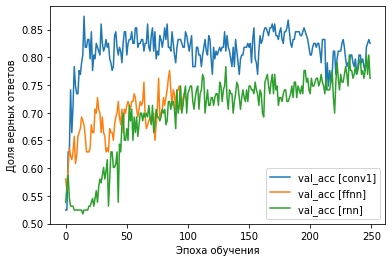

In [76]:
plt.plot(history_conv1.history['val_accuracy'],
        label='val_acc [conv1]')
# plt.plot(history_ffnn.history['accuracy'],
#          label='val [ffnn]')
plt.plot(history_ffnn.history['val_accuracy'],
         label='val_acc [ffnn]')


# plt.plot(history.history['accuracy'],
#          label='val [rnn]')
plt.plot(history.history['val_accuracy'],
         label='val_acc [rnn]')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.savefig('simple_rnn_history_with_2_moves_normal_data.png')

In [77]:
# compare models
print('accurace conv1')
print(model_conv1.evaluate(X_train_res, Y_train_res)[1])
print('accurace ffnn')
print(model_ffnn.evaluate(X_train_res, Y_train_res)[1])
print('accurace rnn')

print(model.evaluate(X_train_res, Y_train_res)[1])

accurace conv1
15/15 [==============================] - 0s 4ms/step - loss: 0.3310 - accuracy: 0.9177
0.9177215099334717
accurace ffnn
15/15 [==============================] - 0s 2ms/step - loss: 1.7793 - accuracy: 0.5591
0.5590717196464539
accurace rnn
15/15 [==============================] - 0s 7ms/step - loss: 0.2696 - accuracy: 0.8966
0.8966244459152222


[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:>]
AxesSubplot(0.125,0.749828;0.775x0.130172)
35
1/1 [==============================] - 0s 52ms/step
172
1/1 [==============================] - 0s 30ms/step
19
1/1 [==============================] - 0s 30ms/step
320
1/1 [==============================] - 0s 22ms/step
263
1/1 [==============================] - 0s 20ms/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


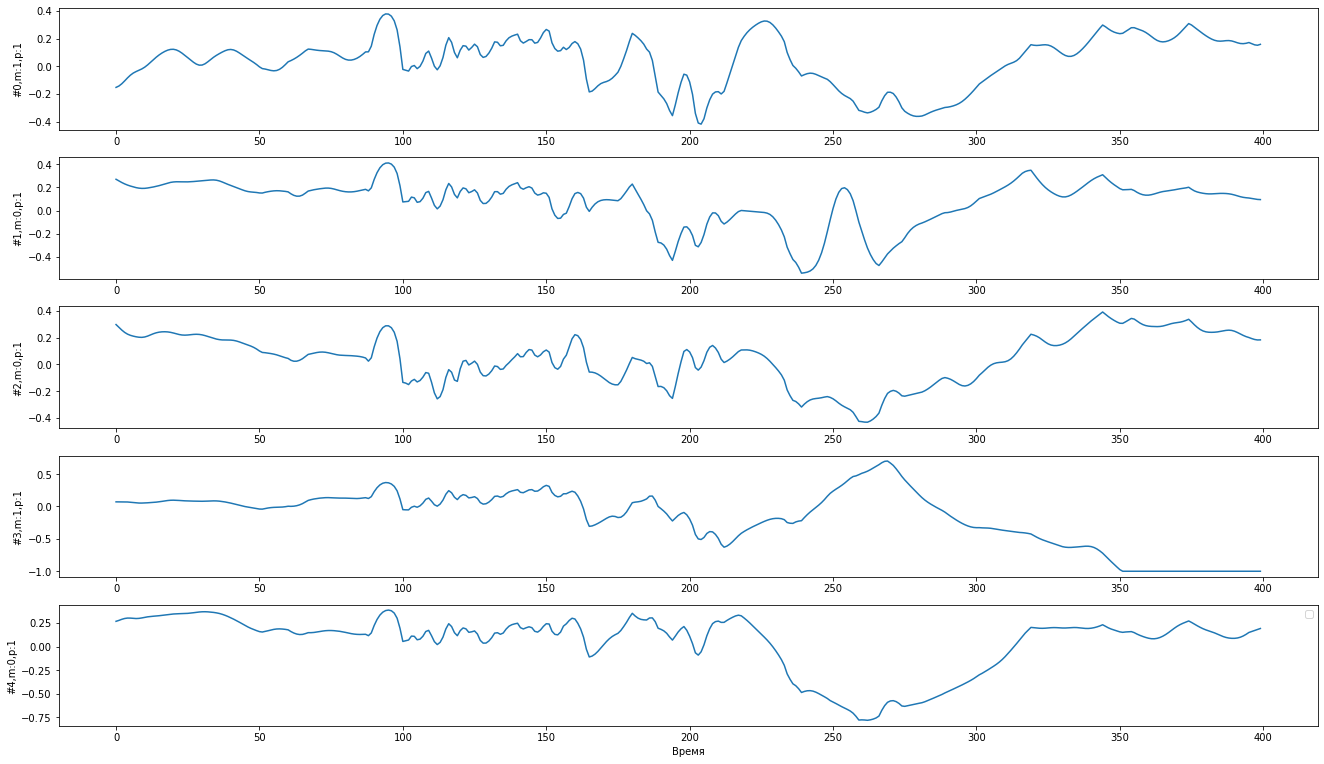

In [113]:
examples = 6
def print_signal_example(X_train_res, num_examples = 5):
    indexes = np.random.randint(0, X_train_res.shape[0] - 1, num_examples)
    fig, axs = plt.subplots(num_examples)
    print(axs)
    print(axs[0])
    i = 0
    for index in indexes:
        print(index)
        y_pred = model.predict(np.array(X_train_res[index:index+1]))
    #     print(X_train[index:index+1])
        # print('X_pred')
        # print(X_train[0:1])
    #     print('y_pred')
    #     print(y_pred)
    #     print('y_real')
    #     print(Y_train_res[index])
    #     print('Is corrrect?')
        move_index = np.argmax(Y_train_res[index])
        is_correct = move_index == np.argmax(Y_train_res[index])
    #     print(X_train_res[index])

        axs[i].plot(X_train_res[index])
        axs[i].set_ylabel('#{0},m:{1},p:{2}'.format(i, move_index, int(is_correct)))
        i += 1

    fig.set_size_inches(18.5, 10.5)
    fig.tight_layout()

    plt.xlabel('Время')
    # plt.ylabel('Импульс')
    plt.legend()
    plt.show()
    
print_signal_example(X_train_res, 5)
# plt.savefig('emg_example.png')

(60, 400)
[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:>]
AxesSubplot(0.125,0.749828;0.775x0.130172)
46
33
31
24
39


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


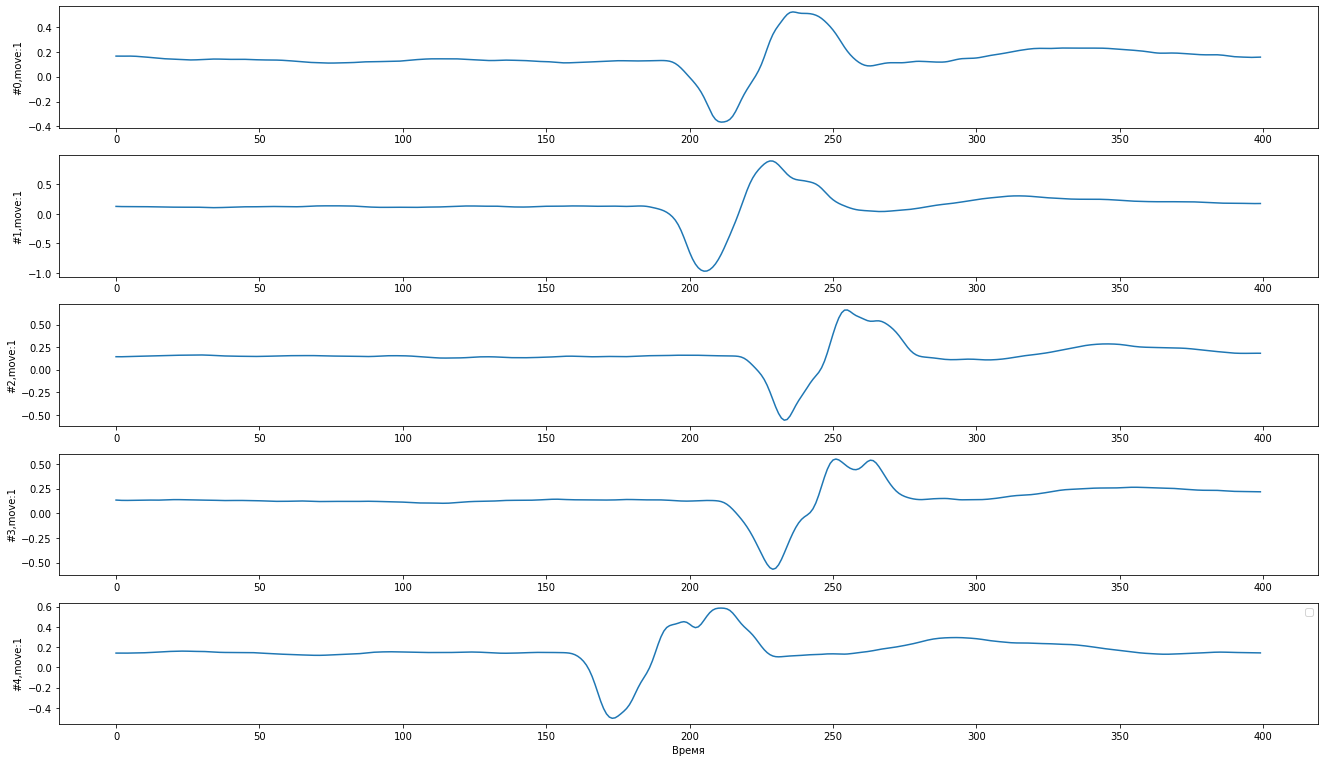

In [130]:
from keras.utils import to_categorical
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pickle
from scipy import signal
from random import shuffle


def _filter_signal(x):
    N = 10
    Fc = 40
    Fs = 1600
    h = signal.firwin(numtaps=N, cutoff=Fc, nyq=Fs / 2)
    y = signal.lfilter(h, 1.0, x)
    return y


def _filter_hz(X):
    """
    Filter the 50 hz noize
    :param X: numpy dataset
    :return:
    """
    X_train_filtered = []
    for X in X:
        X_train_filtered.append(_filter_signal(X))
    X_train_filtered = np.array(X_train_filtered)

    return X_train_filtered


def _filter_avg(X):
    # Moving Average Filter (SMA)
    X_train_filtered_sma0 = []
    for i0 in range(0, X.shape[0]):
        X_train_filtered_sma = []
        last_index = X[i0].shape[0]

        N = 20
        N_half = int(N / 2)

        for i in range(0, last_index):
            X_average = 0
            X_i = X[i0]
            if i >= N_half and i <= last_index - N_half:
                for j in range(i - N_half, i + N_half):
                    X_average += X_i[j]
                X_average /= N
            elif i < N_half:
                for j in range(0, i + N_half):
                    #                 print('+=')
                    #                 print(X_train_scaled[i0][j])
                    X_average += X_i[j]
                X_average /= (i + N_half)
            else:
                for j in range(i - N_half, last_index):
                    X_average += X_i[j]
                X_average /= (last_index - i + N_half)
            #     print('scaled')
            #     print(X_train_scaled[i])
            #     print('average')
            #     print(X_average)
            X_train_filtered_sma.append(X_average)

        #     plt.plot(X_train_scaled[i0],
        #              label='Сигнал scaled ' + str(np.argmax(train_labels[i]) + 1))
        #     plt.xlabel('Время')
        #     plt.ylabel('Импульс')
        #     plt.legend()
        #     plt.show()

        #     plt.plot(X_train_filtered_sma,
        #              label='Сигнал avg ' + str(np.argmax(train_labels[i]) + 1))
        #     plt.xlabel('Время')
        #     plt.ylabel('Импульс')
        #     plt.legend()
        #     plt.show()
        #     break
        X_train_filtered_sma0.append(X_train_filtered_sma)

    return X_train_filtered_sma0


def _scale(X, X_test = None):
    """
    Scale data
    :param X:
    :return:
    """
    if X_test is None:
        X_min =  np.min(X)
        X_max = np.max(X)
#         print("max: {0}, min: {1}".format(X_max, X_min))
        X = (X - X_min)/(X_max - X_min)
        X = X * 2 - 1
        return X
    #     scaler = MinMaxScaler()
        scaler = StandardScaler()
        # transform data
        X_train_scaled = scaler.fit_transform(np.array(X))

        return X_train_scaled
    else:
        X_min =  min(np.min(X), np.min(X_test))
        X_max = max(np.max(X), np.max(X_test))
        
        X = (X - X_min)/(X_max - X_min)
        X = X * 2 - 1
        
        X_test = (X_test - X_min)/(X_max - X_min)
        X_test = X_test * 2 - 1
        
        return X, X_test


def normalize(X, X_test=None):
    if X_test is None:
        X = _filter_hz(X)
        X = _filter_avg(X)
        X = _scale(X)
        return X
    else:
        X = _filter_hz(X)
        X_test = _filter_hz(X_test)
        X = _filter_avg(X)
        X_test = _filter_avg(X_test)
        X, X_test = _scale(X, X_test)
        return X, X_test



def create_dataset(file_path, persons, moves=None):
    """
    Create dataset with 9 movements (indexes: 0 - 8)
    and 6 person (indexes: 1 - 6)
    :param file_path:
    :param persons:
    :param moves:
    :return:
    """
    if (moves is None):
        moves = [0, 1, 2, 3, 4, 5, 6, 7, 8]

    # /Users/antonvasilev/PyCharmProjects/emg-interface/nine_movs_six_sub_split/1_1.pickle
    if file_path[-1] != '/':
        file_path += '/'
    path = file_path + "{}_{}.txt"
    sgn = []
    lbl = []
    for i in persons:
        for j in moves:
            with open(path.format(i, j + 1), "rb") as fp:  # Unpickling
                data = pickle.load(fp)

            for k in range(np.shape(data)[0]):
                sgn.append(data[k])
                lbl.append(j)

    sgn = np.asarray(sgn, dtype=np.float32)
    lbl = np.asarray(lbl, dtype=np.int32)

    c = list(zip(sgn, lbl))
    shuffle(c)
    sgn, lbl = zip(*c)

    sgn = np.asarray(sgn, dtype=np.float64)
    lbl = np.asarray(lbl, dtype=np.int64)

    print(sgn.shape)

    train_signals = sgn[0:int(0.8 * len(sgn))]
    train_labels = lbl[0:int(0.8 * len(lbl))]
    val_signals = sgn[int(0.8 * len(sgn)):]
    val_labels = lbl[int(0.8 * len(lbl)):]
    # test_signals = sgn[int(0.8*len(sgn)):]
    # test_labels = lbl[int(0.8*len(lbl)):]

    train_labels = to_categorical(train_labels)
    val_labels = to_categorical(val_labels)
    # test_labels = to_categorical(test_labels)

    return train_signals, train_labels, val_signals, val_labels


def print_signal_example(X_train_res, labels, num_examples = 5):
    indexes = np.random.randint(0, X_train_res.shape[0] - 1, num_examples)
    fig, axs = plt.subplots(num_examples)
    print(axs)
    print(axs[0])
    i = 0
    for index in indexes:
        print(index)
#         y_pred = model.predict(np.array(X_train_res[index:index+1]))
    #     print(X_train[index:index+1])
        # print('X_pred')
        # print(X_train[0:1])
    #     print('y_pred')
    #     print(y_pred)
    #     print('y_real')
    #     print(Y_train_res[index])
    #     print('Is corrrect?')
        move_index = np.argmax(labels[index])
#         is_correct = move_index == np.argmax(Y_train_res[index])
    #     print(X_train_res[index])

        axs[i].plot(X_train_res[index])
        axs[i].set_ylabel('#{0},move:{1}'.format(i, move_index))
        i += 1

    fig.set_size_inches(18.5, 10.5)
    fig.tight_layout()

    plt.xlabel('Время')
    # plt.ylabel('Импульс')
    plt.legend()
    plt.show()
    
    
# check data
persons = [1]
movements = [1]
X_train, y_train, X_test, y_test = create_dataset(path, persons, movements)
print_signal_example(normalize(X_train), y_train, 5)


In [142]:



# Ищем проблему в моделях

# Берем сначала по 1 пользователю и пару действий и смотрим точность на каждой модели
# После увеличиваем количество людей и действий. Смотрим, где начинает возникать ошибка

# Максимум 1-6 человек
persons_iterator = [
#     [1],
    [1, 2],
#     [1, 3],
#     [1, 4],
#     [1, 5],
#     [1, 6],
#     [1,2,3]
    [1,2,3],
    [1,2,3,4,5,6]
]
# Максимум 0-8 жестов
movements_iterator = [
    [0, 1],
    [0, 1, 2],
#     [0, 1, 2, 3, 4, 5],
    [0, 1, 2, 3, 4, 5, 6, 7, 8],
]

model_names = [
    'dense',
    'conv1d',
    'lstm+dense'
]

# Путь к набору данных
path = os.path.abspath('./data/rf-lab/nine_movs_six_sub_split/')

def model_iterator_factory(data_length, num_sensors, num_classes):
    """
    Создает список моделей, которые мы тестируем
    """
#     print('model_iterator_factory')
    models = []
    dense_model = build_dense_model(data_length, num_sensors, num_classes)
#     dense_model.summary()
    models.append(dense_model)
    conv_model = build_conv1d_model(data_length, num_sensors, num_classes)
#     conv_model.summary()
    models.append(conv_model)
    lstm_model = build_lstm_model(data_length, num_sensors, num_classes)
#     lstm_model.summary()
    models.append(lstm_model)
    return models


EPOCH_COUNT = 100

# hs.write(name)
# hs.close() 
hs = open("fit_results.txt","w")
hs.close()
# Результаты обучения
fit_result = {}
# Индексы для итерирования
person_index = 0
# Перебираем комбинации людей
for persons in persons_iterator:
    movements_index = 0
    fit_result[person_index] = {}
    # Для каждой комбинации людей - проверяем все виды жестов в датасете
    for movements in movements_iterator:
        X_train, y_train, X_test, y_test = create_dataset(path, persons, movements)
#         X_train = normalize(X_train)
        X_trainX_test = normalize(X_train, X_test)
#         plt.plot(X_train[0])
#         plt.show()
#         X_train = normalize(X_train)
#         plt.plot(X_train[0])
#         plt.show()
#         X_test = normalize(X_test)
#         continue
        
        models = model_iterator_factory(X_train.shape[1], 1, len(movements))
        model_index = 0
        fit_result[person_index][movements_index] = {}
        # Тут сравниваем 3 модели для каждой
        for i in range(0, len(models)):
            model_ = models[i]
            model_.summary()
            
#             continue
            # обучаем модель и оцениваем результат
            history = model_.fit(X_train, y_train, epochs=EPOCH_COUNT, batch_size=25, validation_split=0.3, verbose=2)
#             model.evaluate(X_train, y_train)[1]
            
            evaluate_result = model_.evaluate(X_test, y_test)
#             fit_result[person_index][movements_index][model_index] = {
# #                 'history': history,
# #                 'model': model,
#                 'accuracy': evaluate_result[1]
#             }

            hs = open("fit_results.txt","a")
            line = "persons: [{0}], moves: [{1}], model {5}: {2}, accuracy: {3}, loss: {4}\n".format(
                ','.join([str(temp) for temp in persons]),
                ','.join([str(temp) for temp in movements]),
                model_names[model_index],
                evaluate_result[1],
                evaluate_result[0],
                hash(model_)
            )
            hs.write(line)
            hs.close()
#             plt.plot(history.history['val_accuracy'],
#                      label='val_acc')
#             plt.plot(history.history['accuracy'],
#                      label='acc')
#             plt.xlabel('Эпоха обучения')
#             plt.ylabel('Доля верных ответов')
#             plt.legend()
#             plt.show()
#             break
            model_index += 1
        movements_index += 1
    person_index += 1    
        

# print(fit_result)

(210, 400)
Model: "sequential_121"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_412 (Dense)           (None, 256)               102656    
                                                                 
 dropout_405 (Dropout)       (None, 256)               0         
                                                                 
 dense_413 (Dense)           (None, 128)               32896     
                                                                 
 dropout_406 (Dropout)       (None, 128)               0         
                                                                 
 batch_normalization_124 (Ba  (None, 128)              512       
 tchNormalization)                                               
                                                                 
 dense_414 (Dense)           (None, 64)                8256      
                                         

Epoch 50/100
5/5 - 0s - loss: 0.0150 - accuracy: 1.0000 - val_loss: 0.3714 - val_accuracy: 0.9020 - 33ms/epoch - 7ms/step
Epoch 51/100
5/5 - 0s - loss: 0.0893 - accuracy: 0.9829 - val_loss: 0.3956 - val_accuracy: 0.8824 - 32ms/epoch - 6ms/step
Epoch 52/100
5/5 - 0s - loss: 0.0093 - accuracy: 1.0000 - val_loss: 0.5255 - val_accuracy: 0.8039 - 31ms/epoch - 6ms/step
Epoch 53/100
5/5 - 0s - loss: 0.0727 - accuracy: 0.9829 - val_loss: 0.6299 - val_accuracy: 0.8235 - 33ms/epoch - 7ms/step
Epoch 54/100
5/5 - 0s - loss: 0.0257 - accuracy: 0.9915 - val_loss: 0.5967 - val_accuracy: 0.8627 - 32ms/epoch - 6ms/step
Epoch 55/100
5/5 - 0s - loss: 0.0780 - accuracy: 0.9915 - val_loss: 0.6006 - val_accuracy: 0.8627 - 32ms/epoch - 6ms/step
Epoch 56/100
5/5 - 0s - loss: 0.1187 - accuracy: 0.9487 - val_loss: 0.6465 - val_accuracy: 0.8431 - 32ms/epoch - 6ms/step
Epoch 57/100
5/5 - 0s - loss: 0.0360 - accuracy: 0.9915 - val_loss: 0.8798 - val_accuracy: 0.8039 - 32ms/epoch - 6ms/step
Epoch 58/100
5/5 - 0s - 

5/5 - 0s - loss: 0.7328 - accuracy: 0.5043 - val_loss: 0.6663 - val_accuracy: 0.6863 - 96ms/epoch - 19ms/step
Epoch 3/100
5/5 - 0s - loss: 0.6436 - accuracy: 0.5641 - val_loss: 0.6291 - val_accuracy: 0.7843 - 123ms/epoch - 25ms/step
Epoch 4/100
5/5 - 0s - loss: 0.5522 - accuracy: 0.7009 - val_loss: 0.4638 - val_accuracy: 0.7843 - 98ms/epoch - 20ms/step
Epoch 5/100
5/5 - 0s - loss: 0.4666 - accuracy: 0.6923 - val_loss: 0.2588 - val_accuracy: 0.8824 - 93ms/epoch - 19ms/step
Epoch 6/100
5/5 - 0s - loss: 0.4531 - accuracy: 0.7179 - val_loss: 0.2098 - val_accuracy: 0.9216 - 100ms/epoch - 20ms/step
Epoch 7/100
5/5 - 0s - loss: 0.3128 - accuracy: 0.7778 - val_loss: 0.1865 - val_accuracy: 0.9216 - 101ms/epoch - 20ms/step
Epoch 8/100
5/5 - 0s - loss: 0.3025 - accuracy: 0.7863 - val_loss: 0.1044 - val_accuracy: 0.9412 - 114ms/epoch - 23ms/step
Epoch 9/100
5/5 - 0s - loss: 0.4231 - accuracy: 0.7521 - val_loss: 0.1630 - val_accuracy: 0.9608 - 112ms/epoch - 22ms/step
Epoch 10/100
5/5 - 0s - loss: 0

Epoch 69/100
5/5 - 0s - loss: 0.0644 - accuracy: 0.9829 - val_loss: 0.1615 - val_accuracy: 0.9608 - 104ms/epoch - 21ms/step
Epoch 70/100
5/5 - 0s - loss: 0.1867 - accuracy: 0.9402 - val_loss: 0.0738 - val_accuracy: 0.9608 - 90ms/epoch - 18ms/step
Epoch 71/100
5/5 - 0s - loss: 0.0453 - accuracy: 0.9915 - val_loss: 0.0485 - val_accuracy: 0.9804 - 90ms/epoch - 18ms/step
Epoch 72/100
5/5 - 0s - loss: 0.0248 - accuracy: 1.0000 - val_loss: 0.0516 - val_accuracy: 0.9804 - 97ms/epoch - 19ms/step
Epoch 73/100
5/5 - 0s - loss: 0.0352 - accuracy: 0.9915 - val_loss: 0.0537 - val_accuracy: 0.9804 - 91ms/epoch - 18ms/step
Epoch 74/100
5/5 - 0s - loss: 0.0807 - accuracy: 0.9744 - val_loss: 0.0530 - val_accuracy: 0.9804 - 92ms/epoch - 18ms/step
Epoch 75/100
5/5 - 0s - loss: 0.0209 - accuracy: 1.0000 - val_loss: 0.0507 - val_accuracy: 0.9804 - 111ms/epoch - 22ms/step
Epoch 76/100
5/5 - 0s - loss: 0.0456 - accuracy: 0.9829 - val_loss: 0.0514 - val_accuracy: 0.9804 - 106ms/epoch - 21ms/step
Epoch 77/100


Epoch 18/100
5/5 - 0s - loss: 0.1310 - accuracy: 0.9744 - val_loss: 0.3583 - val_accuracy: 0.9216 - 121ms/epoch - 24ms/step
Epoch 19/100
5/5 - 0s - loss: 0.1426 - accuracy: 0.9402 - val_loss: 0.3462 - val_accuracy: 0.9216 - 121ms/epoch - 24ms/step
Epoch 20/100
5/5 - 0s - loss: 0.1493 - accuracy: 0.9573 - val_loss: 0.3329 - val_accuracy: 0.9216 - 123ms/epoch - 25ms/step
Epoch 21/100
5/5 - 0s - loss: 0.1117 - accuracy: 0.9829 - val_loss: 0.3169 - val_accuracy: 0.9216 - 151ms/epoch - 30ms/step
Epoch 22/100
5/5 - 0s - loss: 0.1258 - accuracy: 0.9658 - val_loss: 0.2964 - val_accuracy: 0.9216 - 132ms/epoch - 26ms/step
Epoch 23/100
5/5 - 0s - loss: 0.1519 - accuracy: 0.9316 - val_loss: 0.2859 - val_accuracy: 0.9216 - 129ms/epoch - 26ms/step
Epoch 24/100
5/5 - 0s - loss: 0.1066 - accuracy: 0.9658 - val_loss: 0.2769 - val_accuracy: 0.9216 - 128ms/epoch - 26ms/step
Epoch 25/100
5/5 - 0s - loss: 0.1200 - accuracy: 0.9487 - val_loss: 0.2682 - val_accuracy: 0.9216 - 124ms/epoch - 25ms/step
Epoch 26

5/5 - 0s - loss: 0.0125 - accuracy: 1.0000 - val_loss: 0.1346 - val_accuracy: 0.9412 - 152ms/epoch - 30ms/step
Epoch 85/100
5/5 - 0s - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.1345 - val_accuracy: 0.9412 - 149ms/epoch - 30ms/step
Epoch 86/100
5/5 - 0s - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.1237 - val_accuracy: 0.9412 - 130ms/epoch - 26ms/step
Epoch 87/100
5/5 - 0s - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.1168 - val_accuracy: 0.9412 - 123ms/epoch - 25ms/step
Epoch 88/100
5/5 - 0s - loss: 0.0172 - accuracy: 0.9915 - val_loss: 0.1128 - val_accuracy: 0.9412 - 123ms/epoch - 25ms/step
Epoch 89/100
5/5 - 0s - loss: 0.0134 - accuracy: 1.0000 - val_loss: 0.1031 - val_accuracy: 0.9412 - 131ms/epoch - 26ms/step
Epoch 90/100
5/5 - 0s - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0937 - val_accuracy: 0.9412 - 147ms/epoch - 29ms/step
Epoch 91/100
5/5 - 0s - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.0847 - val_accuracy: 0.9412 - 129ms/epoch - 26ms/step
Epoch 92/100
5/5 - 0s

Epoch 32/100
8/8 - 0s - loss: 0.3237 - accuracy: 0.8846 - val_loss: 0.9534 - val_accuracy: 0.7468 - 36ms/epoch - 4ms/step
Epoch 33/100
8/8 - 0s - loss: 0.2094 - accuracy: 0.9341 - val_loss: 0.9883 - val_accuracy: 0.7468 - 36ms/epoch - 4ms/step
Epoch 34/100
8/8 - 0s - loss: 0.3187 - accuracy: 0.9011 - val_loss: 0.9915 - val_accuracy: 0.7595 - 36ms/epoch - 4ms/step
Epoch 35/100
8/8 - 0s - loss: 0.2074 - accuracy: 0.9341 - val_loss: 0.9065 - val_accuracy: 0.7342 - 41ms/epoch - 5ms/step
Epoch 36/100
8/8 - 0s - loss: 0.1791 - accuracy: 0.9451 - val_loss: 0.8409 - val_accuracy: 0.7342 - 37ms/epoch - 5ms/step
Epoch 37/100
8/8 - 0s - loss: 0.2483 - accuracy: 0.9286 - val_loss: 0.8125 - val_accuracy: 0.7468 - 35ms/epoch - 4ms/step
Epoch 38/100
8/8 - 0s - loss: 0.1913 - accuracy: 0.9341 - val_loss: 0.8723 - val_accuracy: 0.7468 - 36ms/epoch - 5ms/step
Epoch 39/100
8/8 - 0s - loss: 0.2595 - accuracy: 0.9121 - val_loss: 0.9452 - val_accuracy: 0.7342 - 37ms/epoch - 5ms/step
Epoch 40/100
8/8 - 0s - 

Epoch 100/100
8/8 - 0s - loss: 0.1903 - accuracy: 0.9231 - val_loss: 1.1819 - val_accuracy: 0.6835 - 38ms/epoch - 5ms/step
3/3 [==============================] - 0s 2ms/step - loss: 1.1502 - accuracy: 0.6212
Model: "sequential_125"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_80 (Reshape)        (None, 400, 1)            0         
                                                                 
 conv1d_156 (Conv1D)         (None, 321, 25)           2025      
                                                                 
 conv1d_157 (Conv1D)         (None, 316, 25)           3775      
                                                                 
 max_pooling1d_39 (MaxPoolin  (None, 105, 25)          0         
 g1D)                                                            
                                                                 
 conv1d_158 (Conv1D)         (None, 100, 1

Epoch 52/100
8/8 - 0s - loss: 1.0911 - accuracy: 0.3901 - val_loss: 1.1126 - val_accuracy: 0.3165 - 125ms/epoch - 16ms/step
Epoch 53/100
8/8 - 0s - loss: 1.0908 - accuracy: 0.3901 - val_loss: 1.1130 - val_accuracy: 0.3165 - 128ms/epoch - 16ms/step
Epoch 54/100
8/8 - 0s - loss: 1.0905 - accuracy: 0.3901 - val_loss: 1.1110 - val_accuracy: 0.3165 - 114ms/epoch - 14ms/step
Epoch 55/100
8/8 - 0s - loss: 1.0904 - accuracy: 0.3901 - val_loss: 1.1104 - val_accuracy: 0.3165 - 111ms/epoch - 14ms/step
Epoch 56/100
8/8 - 0s - loss: 1.0905 - accuracy: 0.3901 - val_loss: 1.1100 - val_accuracy: 0.3165 - 114ms/epoch - 14ms/step
Epoch 57/100
8/8 - 0s - loss: 1.0906 - accuracy: 0.3901 - val_loss: 1.1104 - val_accuracy: 0.3165 - 136ms/epoch - 17ms/step
Epoch 58/100
8/8 - 0s - loss: 1.0908 - accuracy: 0.3901 - val_loss: 1.1094 - val_accuracy: 0.3165 - 125ms/epoch - 16ms/step
Epoch 59/100
8/8 - 0s - loss: 1.0907 - accuracy: 0.3901 - val_loss: 1.1097 - val_accuracy: 0.3165 - 151ms/epoch - 19ms/step
Epoch 60

Epoch 1/100
8/8 - 4s - loss: 1.4598 - accuracy: 0.4286 - val_loss: 1.0504 - val_accuracy: 0.4430 - 4s/epoch - 527ms/step
Epoch 2/100
8/8 - 0s - loss: 1.0694 - accuracy: 0.5330 - val_loss: 1.0435 - val_accuracy: 0.4937 - 218ms/epoch - 27ms/step
Epoch 3/100
8/8 - 0s - loss: 1.1066 - accuracy: 0.5165 - val_loss: 1.0218 - val_accuracy: 0.5443 - 206ms/epoch - 26ms/step
Epoch 4/100
8/8 - 0s - loss: 0.9921 - accuracy: 0.5714 - val_loss: 1.0013 - val_accuracy: 0.5823 - 200ms/epoch - 25ms/step
Epoch 5/100
8/8 - 0s - loss: 0.7709 - accuracy: 0.6703 - val_loss: 0.9777 - val_accuracy: 0.5823 - 196ms/epoch - 25ms/step
Epoch 6/100
8/8 - 0s - loss: 0.8811 - accuracy: 0.6154 - val_loss: 0.9527 - val_accuracy: 0.5949 - 199ms/epoch - 25ms/step
Epoch 7/100
8/8 - 0s - loss: 0.8005 - accuracy: 0.6648 - val_loss: 0.9298 - val_accuracy: 0.6076 - 211ms/epoch - 26ms/step
Epoch 8/100
8/8 - 0s - loss: 0.7458 - accuracy: 0.6593 - val_loss: 0.8976 - val_accuracy: 0.6456 - 212ms/epoch - 27ms/step
Epoch 9/100
8/8 - 

Epoch 68/100
8/8 - 0s - loss: 0.0573 - accuracy: 0.9890 - val_loss: 0.5218 - val_accuracy: 0.8608 - 201ms/epoch - 25ms/step
Epoch 69/100
8/8 - 0s - loss: 0.0515 - accuracy: 0.9890 - val_loss: 0.4271 - val_accuracy: 0.8354 - 215ms/epoch - 27ms/step
Epoch 70/100
8/8 - 0s - loss: 0.0241 - accuracy: 0.9945 - val_loss: 0.6821 - val_accuracy: 0.8228 - 201ms/epoch - 25ms/step
Epoch 71/100
8/8 - 0s - loss: 0.0482 - accuracy: 0.9835 - val_loss: 0.5338 - val_accuracy: 0.8608 - 208ms/epoch - 26ms/step
Epoch 72/100
8/8 - 0s - loss: 0.0350 - accuracy: 0.9945 - val_loss: 0.4423 - val_accuracy: 0.8734 - 220ms/epoch - 27ms/step
Epoch 73/100
8/8 - 0s - loss: 0.0594 - accuracy: 0.9835 - val_loss: 0.4401 - val_accuracy: 0.8861 - 218ms/epoch - 27ms/step
Epoch 74/100
8/8 - 0s - loss: 0.0342 - accuracy: 0.9945 - val_loss: 0.4933 - val_accuracy: 0.8734 - 243ms/epoch - 30ms/step
Epoch 75/100
8/8 - 0s - loss: 0.0280 - accuracy: 0.9945 - val_loss: 0.4501 - val_accuracy: 0.8734 - 229ms/epoch - 29ms/step
Epoch 76

Epoch 15/100
24/24 - 0s - loss: 1.1864 - accuracy: 0.5949 - val_loss: 1.5064 - val_accuracy: 0.5458 - 90ms/epoch - 4ms/step
Epoch 16/100
24/24 - 0s - loss: 1.1849 - accuracy: 0.6017 - val_loss: 1.6216 - val_accuracy: 0.5179 - 94ms/epoch - 4ms/step
Epoch 17/100
24/24 - 0s - loss: 1.1344 - accuracy: 0.6034 - val_loss: 1.6575 - val_accuracy: 0.5020 - 86ms/epoch - 4ms/step
Epoch 18/100
24/24 - 0s - loss: 1.2862 - accuracy: 0.5607 - val_loss: 1.6544 - val_accuracy: 0.4741 - 102ms/epoch - 4ms/step
Epoch 19/100
24/24 - 0s - loss: 1.2373 - accuracy: 0.5812 - val_loss: 1.5673 - val_accuracy: 0.4980 - 84ms/epoch - 4ms/step
Epoch 20/100
24/24 - 0s - loss: 1.2247 - accuracy: 0.5863 - val_loss: 1.5711 - val_accuracy: 0.5618 - 81ms/epoch - 3ms/step
Epoch 21/100
24/24 - 0s - loss: 1.1902 - accuracy: 0.5778 - val_loss: 1.4406 - val_accuracy: 0.5339 - 77ms/epoch - 3ms/step
Epoch 22/100
24/24 - 0s - loss: 1.1394 - accuracy: 0.6188 - val_loss: 1.3798 - val_accuracy: 0.5498 - 82ms/epoch - 3ms/step
Epoch 2

24/24 - 0s - loss: 0.4022 - accuracy: 0.8821 - val_loss: 1.6275 - val_accuracy: 0.5857 - 74ms/epoch - 3ms/step
Epoch 82/100
24/24 - 0s - loss: 0.4482 - accuracy: 0.8735 - val_loss: 1.6206 - val_accuracy: 0.6215 - 73ms/epoch - 3ms/step
Epoch 83/100
24/24 - 0s - loss: 0.3035 - accuracy: 0.9128 - val_loss: 1.7262 - val_accuracy: 0.6096 - 72ms/epoch - 3ms/step
Epoch 84/100
24/24 - 0s - loss: 0.4076 - accuracy: 0.8718 - val_loss: 1.7251 - val_accuracy: 0.5896 - 77ms/epoch - 3ms/step
Epoch 85/100
24/24 - 0s - loss: 0.4865 - accuracy: 0.8496 - val_loss: 1.8275 - val_accuracy: 0.5936 - 71ms/epoch - 3ms/step
Epoch 86/100
24/24 - 0s - loss: 0.3971 - accuracy: 0.8769 - val_loss: 1.6452 - val_accuracy: 0.6016 - 78ms/epoch - 3ms/step
Epoch 87/100
24/24 - 0s - loss: 0.3607 - accuracy: 0.8906 - val_loss: 1.6964 - val_accuracy: 0.6096 - 95ms/epoch - 4ms/step
Epoch 88/100
24/24 - 0s - loss: 0.3926 - accuracy: 0.8718 - val_loss: 1.7389 - val_accuracy: 0.5817 - 82ms/epoch - 3ms/step
Epoch 89/100
24/24 - 

24/24 - 0s - loss: 1.5523 - accuracy: 0.3726 - val_loss: 1.4210 - val_accuracy: 0.5060 - 358ms/epoch - 15ms/step
Epoch 33/100
24/24 - 0s - loss: 1.4223 - accuracy: 0.4154 - val_loss: 1.3325 - val_accuracy: 0.5219 - 344ms/epoch - 14ms/step
Epoch 34/100
24/24 - 0s - loss: 1.5410 - accuracy: 0.3761 - val_loss: 1.4565 - val_accuracy: 0.4821 - 340ms/epoch - 14ms/step
Epoch 35/100
24/24 - 0s - loss: 1.4705 - accuracy: 0.4171 - val_loss: 1.3969 - val_accuracy: 0.5259 - 362ms/epoch - 15ms/step
Epoch 36/100
24/24 - 0s - loss: 1.4023 - accuracy: 0.4308 - val_loss: 1.2992 - val_accuracy: 0.5339 - 373ms/epoch - 16ms/step
Epoch 37/100
24/24 - 0s - loss: 1.3672 - accuracy: 0.4496 - val_loss: 1.2889 - val_accuracy: 0.5020 - 365ms/epoch - 15ms/step
Epoch 38/100
24/24 - 0s - loss: 1.3584 - accuracy: 0.4496 - val_loss: 1.2453 - val_accuracy: 0.5737 - 366ms/epoch - 15ms/step
Epoch 39/100
24/24 - 0s - loss: 1.3684 - accuracy: 0.4718 - val_loss: 1.3663 - val_accuracy: 0.4821 - 368ms/epoch - 15ms/step
Epoch

Epoch 98/100
24/24 - 0s - loss: 1.1690 - accuracy: 0.5487 - val_loss: 1.2608 - val_accuracy: 0.6494 - 312ms/epoch - 13ms/step
Epoch 99/100
24/24 - 0s - loss: 1.1532 - accuracy: 0.5897 - val_loss: 1.3583 - val_accuracy: 0.6215 - 308ms/epoch - 13ms/step
Epoch 100/100
24/24 - 0s - loss: 1.1058 - accuracy: 0.6051 - val_loss: 1.3238 - val_accuracy: 0.6255 - 309ms/epoch - 13ms/step
7/7 [==============================] - 0s 3ms/step - loss: 1.3577 - accuracy: 0.5742
Model: "sequential_129"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_83 (Reshape)        (None, 40, 10)            0         
                                                                 
 lstm_80 (LSTM)              (None, 40, 64)            19200     
                                                                 
 dropout_431 (Dropout)       (None, 40, 64)            0         
                                                  

Epoch 46/100
24/24 - 1s - loss: 0.2378 - accuracy: 0.9333 - val_loss: 1.1934 - val_accuracy: 0.6335 - 565ms/epoch - 24ms/step
Epoch 47/100
24/24 - 1s - loss: 0.2553 - accuracy: 0.9231 - val_loss: 1.1614 - val_accuracy: 0.6454 - 557ms/epoch - 23ms/step
Epoch 48/100
24/24 - 1s - loss: 0.2648 - accuracy: 0.9145 - val_loss: 1.0994 - val_accuracy: 0.6972 - 568ms/epoch - 24ms/step
Epoch 49/100
24/24 - 1s - loss: 0.2321 - accuracy: 0.9419 - val_loss: 1.0710 - val_accuracy: 0.6773 - 582ms/epoch - 24ms/step
Epoch 50/100
24/24 - 1s - loss: 0.2518 - accuracy: 0.9248 - val_loss: 1.1088 - val_accuracy: 0.6972 - 600ms/epoch - 25ms/step
Epoch 51/100
24/24 - 1s - loss: 0.1776 - accuracy: 0.9641 - val_loss: 1.1017 - val_accuracy: 0.6853 - 660ms/epoch - 27ms/step
Epoch 52/100
24/24 - 1s - loss: 0.1874 - accuracy: 0.9556 - val_loss: 1.1202 - val_accuracy: 0.6892 - 586ms/epoch - 24ms/step
Epoch 53/100
24/24 - 1s - loss: 0.1775 - accuracy: 0.9453 - val_loss: 1.0235 - val_accuracy: 0.7171 - 628ms/epoch - 26

 dense_445 (Dense)           (None, 32)                2080      
                                                                 
 dropout_438 (Dropout)       (None, 32)                0         
                                                                 
 dense_446 (Dense)           (None, 32)                1056      
                                                                 
 dropout_439 (Dropout)       (None, 32)                0         
                                                                 
 batch_normalization_134 (Ba  (None, 32)               128       
 tchNormalization)                                               
                                                                 
 dense_447 (Dense)           (None, 2)                 66        
                                                                 
Total params: 147,650
Trainable params: 147,330
Non-trainable params: 320
_________________________________________________________________
Ep

Epoch 60/100
7/7 - 0s - loss: 0.0672 - accuracy: 0.9688 - val_loss: 0.9913 - val_accuracy: 0.7536 - 36ms/epoch - 5ms/step
Epoch 61/100
7/7 - 0s - loss: 0.0416 - accuracy: 0.9875 - val_loss: 1.0175 - val_accuracy: 0.7681 - 34ms/epoch - 5ms/step
Epoch 62/100
7/7 - 0s - loss: 0.0350 - accuracy: 0.9875 - val_loss: 0.9343 - val_accuracy: 0.7826 - 34ms/epoch - 5ms/step
Epoch 63/100
7/7 - 0s - loss: 0.0318 - accuracy: 0.9875 - val_loss: 0.8304 - val_accuracy: 0.7971 - 38ms/epoch - 5ms/step
Epoch 64/100
7/7 - 0s - loss: 0.0587 - accuracy: 0.9750 - val_loss: 0.8478 - val_accuracy: 0.7826 - 38ms/epoch - 5ms/step
Epoch 65/100
7/7 - 0s - loss: 0.1114 - accuracy: 0.9688 - val_loss: 0.7680 - val_accuracy: 0.7971 - 37ms/epoch - 5ms/step
Epoch 66/100
7/7 - 0s - loss: 0.1683 - accuracy: 0.9500 - val_loss: 0.8231 - val_accuracy: 0.7536 - 36ms/epoch - 5ms/step
Epoch 67/100
7/7 - 0s - loss: 0.0659 - accuracy: 0.9750 - val_loss: 0.9300 - val_accuracy: 0.7246 - 35ms/epoch - 5ms/step
Epoch 68/100
7/7 - 0s - 

7/7 - 0s - loss: 0.2827 - accuracy: 0.9125 - val_loss: 0.1333 - val_accuracy: 0.9710 - 106ms/epoch - 15ms/step
Epoch 13/100
7/7 - 0s - loss: 0.2187 - accuracy: 0.9250 - val_loss: 0.1544 - val_accuracy: 0.9275 - 105ms/epoch - 15ms/step
Epoch 14/100
7/7 - 0s - loss: 0.2579 - accuracy: 0.9000 - val_loss: 0.1912 - val_accuracy: 0.9275 - 119ms/epoch - 17ms/step
Epoch 15/100
7/7 - 0s - loss: 0.1784 - accuracy: 0.9375 - val_loss: 0.1632 - val_accuracy: 0.9130 - 108ms/epoch - 15ms/step
Epoch 16/100
7/7 - 0s - loss: 0.2642 - accuracy: 0.8875 - val_loss: 0.2074 - val_accuracy: 0.9130 - 106ms/epoch - 15ms/step
Epoch 17/100
7/7 - 0s - loss: 0.2028 - accuracy: 0.9312 - val_loss: 0.1785 - val_accuracy: 0.9420 - 114ms/epoch - 16ms/step
Epoch 18/100
7/7 - 0s - loss: 0.1979 - accuracy: 0.9375 - val_loss: 0.2043 - val_accuracy: 0.9420 - 108ms/epoch - 15ms/step
Epoch 19/100
7/7 - 0s - loss: 0.1001 - accuracy: 0.9875 - val_loss: 0.1449 - val_accuracy: 0.9565 - 103ms/epoch - 15ms/step
Epoch 20/100
7/7 - 0s

Epoch 79/100
7/7 - 0s - loss: 0.0166 - accuracy: 0.9937 - val_loss: 0.2247 - val_accuracy: 0.9420 - 106ms/epoch - 15ms/step
Epoch 80/100
7/7 - 0s - loss: 0.0685 - accuracy: 0.9937 - val_loss: 0.4633 - val_accuracy: 0.9420 - 99ms/epoch - 14ms/step
Epoch 81/100
7/7 - 0s - loss: 0.0345 - accuracy: 0.9937 - val_loss: 0.8313 - val_accuracy: 0.9420 - 103ms/epoch - 15ms/step
Epoch 82/100
7/7 - 0s - loss: 0.0600 - accuracy: 0.9875 - val_loss: 0.3315 - val_accuracy: 0.9420 - 96ms/epoch - 14ms/step
Epoch 83/100
7/7 - 0s - loss: 0.0294 - accuracy: 0.9937 - val_loss: 0.1335 - val_accuracy: 0.9420 - 105ms/epoch - 15ms/step
Epoch 84/100
7/7 - 0s - loss: 0.0117 - accuracy: 1.0000 - val_loss: 0.1144 - val_accuracy: 0.9420 - 103ms/epoch - 15ms/step
Epoch 85/100
7/7 - 0s - loss: 0.0167 - accuracy: 0.9937 - val_loss: 0.2972 - val_accuracy: 0.9420 - 105ms/epoch - 15ms/step
Epoch 86/100
7/7 - 0s - loss: 0.0230 - accuracy: 1.0000 - val_loss: 0.2363 - val_accuracy: 0.9710 - 103ms/epoch - 15ms/step
Epoch 87/1

Epoch 28/100
7/7 - 0s - loss: 0.0977 - accuracy: 0.9812 - val_loss: 0.3694 - val_accuracy: 0.8406 - 163ms/epoch - 23ms/step
Epoch 29/100
7/7 - 0s - loss: 0.0840 - accuracy: 0.9688 - val_loss: 0.3739 - val_accuracy: 0.8406 - 161ms/epoch - 23ms/step
Epoch 30/100
7/7 - 0s - loss: 0.0684 - accuracy: 0.9875 - val_loss: 0.3864 - val_accuracy: 0.8261 - 174ms/epoch - 25ms/step
Epoch 31/100
7/7 - 0s - loss: 0.0800 - accuracy: 0.9812 - val_loss: 0.3988 - val_accuracy: 0.8116 - 178ms/epoch - 25ms/step
Epoch 32/100
7/7 - 0s - loss: 0.0965 - accuracy: 0.9563 - val_loss: 0.4093 - val_accuracy: 0.8261 - 205ms/epoch - 29ms/step
Epoch 33/100
7/7 - 0s - loss: 0.0475 - accuracy: 0.9937 - val_loss: 0.3937 - val_accuracy: 0.8406 - 201ms/epoch - 29ms/step
Epoch 34/100
7/7 - 0s - loss: 0.0577 - accuracy: 0.9812 - val_loss: 0.3879 - val_accuracy: 0.8116 - 177ms/epoch - 25ms/step
Epoch 35/100
7/7 - 0s - loss: 0.1033 - accuracy: 0.9500 - val_loss: 0.3957 - val_accuracy: 0.8406 - 179ms/epoch - 26ms/step
Epoch 36

7/7 - 0s - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.6741 - val_accuracy: 0.8696 - 181ms/epoch - 26ms/step
Epoch 95/100
7/7 - 0s - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.6609 - val_accuracy: 0.8551 - 159ms/epoch - 23ms/step
Epoch 96/100
7/7 - 0s - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.6653 - val_accuracy: 0.8551 - 195ms/epoch - 28ms/step
Epoch 97/100
7/7 - 0s - loss: 0.0132 - accuracy: 1.0000 - val_loss: 0.6655 - val_accuracy: 0.8406 - 232ms/epoch - 33ms/step
Epoch 98/100
7/7 - 0s - loss: 0.0115 - accuracy: 1.0000 - val_loss: 0.6527 - val_accuracy: 0.8551 - 176ms/epoch - 25ms/step
Epoch 99/100
7/7 - 0s - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.6589 - val_accuracy: 0.8551 - 168ms/epoch - 24ms/step
Epoch 100/100
7/7 - 0s - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.6902 - val_accuracy: 0.8551 - 169ms/epoch - 24ms/step
2/2 [==============================] - 0s 6ms/step - loss: 0.4436 - accuracy: 0.8793
(446, 400)
Model: "sequential_133"
________________________

10/10 - 0s - loss: 0.1782 - accuracy: 0.9357 - val_loss: 1.5708 - val_accuracy: 0.5794 - 48ms/epoch - 5ms/step
Epoch 42/100
10/10 - 0s - loss: 0.1206 - accuracy: 0.9639 - val_loss: 1.5945 - val_accuracy: 0.5981 - 45ms/epoch - 4ms/step
Epoch 43/100
10/10 - 0s - loss: 0.1375 - accuracy: 0.9598 - val_loss: 1.6898 - val_accuracy: 0.5888 - 41ms/epoch - 4ms/step
Epoch 44/100
10/10 - 0s - loss: 0.1428 - accuracy: 0.9478 - val_loss: 1.8468 - val_accuracy: 0.5514 - 41ms/epoch - 4ms/step
Epoch 45/100
10/10 - 0s - loss: 0.1414 - accuracy: 0.9598 - val_loss: 1.8392 - val_accuracy: 0.5701 - 44ms/epoch - 4ms/step
Epoch 46/100
10/10 - 0s - loss: 0.1253 - accuracy: 0.9679 - val_loss: 1.8813 - val_accuracy: 0.5421 - 41ms/epoch - 4ms/step
Epoch 47/100
10/10 - 0s - loss: 0.1812 - accuracy: 0.9398 - val_loss: 1.9339 - val_accuracy: 0.5794 - 41ms/epoch - 4ms/step
Epoch 48/100
10/10 - 0s - loss: 0.1849 - accuracy: 0.9478 - val_loss: 1.9060 - val_accuracy: 0.5421 - 41ms/epoch - 4ms/step
Epoch 49/100
10/10 - 

 g1D)                                                            
                                                                 
 conv1d_170 (Conv1D)         (None, 100, 16)           2416      
                                                                 
 conv1d_171 (Conv1D)         (None, 97, 12)            780       
                                                                 
 global_average_pooling1d_42  (None, 12)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dropout_450 (Dropout)       (None, 12)                0         
                                                                 
 dense_458 (Dense)           (None, 3)                 39        
                                                                 
Total params: 9,035
Trainable params: 9,035
Non-trainable params: 0
_________________________________________________________________
Epoch 1/

Epoch 58/100
10/10 - 0s - loss: 0.2660 - accuracy: 0.9317 - val_loss: 1.3503 - val_accuracy: 0.7477 - 153ms/epoch - 15ms/step
Epoch 59/100
10/10 - 0s - loss: 0.6021 - accuracy: 0.7751 - val_loss: 2.0078 - val_accuracy: 0.6729 - 161ms/epoch - 16ms/step
Epoch 60/100
10/10 - 0s - loss: 0.6756 - accuracy: 0.7269 - val_loss: 0.6615 - val_accuracy: 0.8505 - 153ms/epoch - 15ms/step
Epoch 61/100
10/10 - 0s - loss: 0.5353 - accuracy: 0.8072 - val_loss: 0.9111 - val_accuracy: 0.7196 - 147ms/epoch - 15ms/step
Epoch 62/100
10/10 - 0s - loss: 0.4056 - accuracy: 0.8554 - val_loss: 1.7056 - val_accuracy: 0.6542 - 148ms/epoch - 15ms/step
Epoch 63/100
10/10 - 0s - loss: 0.5572 - accuracy: 0.7550 - val_loss: 2.1908 - val_accuracy: 0.6916 - 155ms/epoch - 16ms/step
Epoch 64/100
10/10 - 0s - loss: 0.6932 - accuracy: 0.7229 - val_loss: 0.6972 - val_accuracy: 0.7196 - 155ms/epoch - 16ms/step
Epoch 65/100
10/10 - 0s - loss: 0.5735 - accuracy: 0.7470 - val_loss: 1.1435 - val_accuracy: 0.6916 - 146ms/epoch - 15

Epoch 6/100
10/10 - 0s - loss: 0.8684 - accuracy: 0.5984 - val_loss: 0.9462 - val_accuracy: 0.6449 - 262ms/epoch - 26ms/step
Epoch 7/100
10/10 - 0s - loss: 0.7577 - accuracy: 0.6627 - val_loss: 0.9063 - val_accuracy: 0.6822 - 244ms/epoch - 24ms/step
Epoch 8/100
10/10 - 0s - loss: 0.6554 - accuracy: 0.7108 - val_loss: 0.8758 - val_accuracy: 0.7009 - 262ms/epoch - 26ms/step
Epoch 9/100
10/10 - 1s - loss: 0.6276 - accuracy: 0.7751 - val_loss: 0.8575 - val_accuracy: 0.7103 - 579ms/epoch - 58ms/step
Epoch 10/100
10/10 - 0s - loss: 0.5886 - accuracy: 0.7671 - val_loss: 0.8425 - val_accuracy: 0.6916 - 422ms/epoch - 42ms/step
Epoch 11/100
10/10 - 0s - loss: 0.5354 - accuracy: 0.8273 - val_loss: 0.8033 - val_accuracy: 0.6916 - 357ms/epoch - 36ms/step
Epoch 12/100
10/10 - 0s - loss: 0.4468 - accuracy: 0.8474 - val_loss: 0.7839 - val_accuracy: 0.7196 - 399ms/epoch - 40ms/step
Epoch 13/100
10/10 - 0s - loss: 0.4208 - accuracy: 0.8594 - val_loss: 0.7644 - val_accuracy: 0.7103 - 337ms/epoch - 34ms/s

10/10 - 0s - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.8302 - val_accuracy: 0.7757 - 288ms/epoch - 29ms/step
Epoch 72/100
10/10 - 0s - loss: 0.0218 - accuracy: 0.9960 - val_loss: 0.7557 - val_accuracy: 0.7944 - 260ms/epoch - 26ms/step
Epoch 73/100
10/10 - 0s - loss: 0.0343 - accuracy: 0.9880 - val_loss: 0.6866 - val_accuracy: 0.8131 - 253ms/epoch - 25ms/step
Epoch 74/100
10/10 - 0s - loss: 0.0403 - accuracy: 0.9960 - val_loss: 0.8101 - val_accuracy: 0.7570 - 256ms/epoch - 26ms/step
Epoch 75/100
10/10 - 0s - loss: 0.0263 - accuracy: 1.0000 - val_loss: 0.8321 - val_accuracy: 0.7850 - 255ms/epoch - 26ms/step
Epoch 76/100
10/10 - 0s - loss: 0.0359 - accuracy: 0.9920 - val_loss: 0.8726 - val_accuracy: 0.7290 - 254ms/epoch - 25ms/step
Epoch 77/100
10/10 - 0s - loss: 0.0226 - accuracy: 0.9960 - val_loss: 0.7463 - val_accuracy: 0.7850 - 252ms/epoch - 25ms/step
Epoch 78/100
10/10 - 0s - loss: 0.0221 - accuracy: 0.9960 - val_loss: 0.7496 - val_accuracy: 0.7290 - 260ms/epoch - 26ms/step
Epoch

Epoch 18/100
32/32 - 0s - loss: 1.3855 - accuracy: 0.4660 - val_loss: 1.6322 - val_accuracy: 0.4521 - 88ms/epoch - 3ms/step
Epoch 19/100
32/32 - 0s - loss: 1.4406 - accuracy: 0.4236 - val_loss: 1.6944 - val_accuracy: 0.4491 - 99ms/epoch - 3ms/step
Epoch 20/100
32/32 - 0s - loss: 1.3973 - accuracy: 0.4467 - val_loss: 1.7132 - val_accuracy: 0.4461 - 95ms/epoch - 3ms/step
Epoch 21/100
32/32 - 0s - loss: 1.4065 - accuracy: 0.4608 - val_loss: 1.5667 - val_accuracy: 0.4731 - 89ms/epoch - 3ms/step
Epoch 22/100
32/32 - 0s - loss: 1.3426 - accuracy: 0.4814 - val_loss: 1.5709 - val_accuracy: 0.4461 - 89ms/epoch - 3ms/step
Epoch 23/100
32/32 - 0s - loss: 1.2512 - accuracy: 0.5148 - val_loss: 1.5832 - val_accuracy: 0.5000 - 116ms/epoch - 4ms/step
Epoch 24/100
32/32 - 0s - loss: 1.2831 - accuracy: 0.4917 - val_loss: 1.6215 - val_accuracy: 0.4731 - 93ms/epoch - 3ms/step
Epoch 25/100
32/32 - 0s - loss: 1.2012 - accuracy: 0.5404 - val_loss: 1.5893 - val_accuracy: 0.4551 - 85ms/epoch - 3ms/step
Epoch 2

32/32 - 0s - loss: 0.5809 - accuracy: 0.8254 - val_loss: 1.7520 - val_accuracy: 0.5808 - 91ms/epoch - 3ms/step
Epoch 85/100
32/32 - 0s - loss: 0.5958 - accuracy: 0.8113 - val_loss: 1.5929 - val_accuracy: 0.5719 - 96ms/epoch - 3ms/step
Epoch 86/100
32/32 - 0s - loss: 0.5368 - accuracy: 0.8267 - val_loss: 1.7036 - val_accuracy: 0.5479 - 91ms/epoch - 3ms/step
Epoch 87/100
32/32 - 0s - loss: 0.5903 - accuracy: 0.8113 - val_loss: 1.6093 - val_accuracy: 0.5359 - 91ms/epoch - 3ms/step
Epoch 88/100
32/32 - 0s - loss: 0.5909 - accuracy: 0.8139 - val_loss: 1.6632 - val_accuracy: 0.5359 - 92ms/epoch - 3ms/step
Epoch 89/100
32/32 - 0s - loss: 0.6501 - accuracy: 0.7856 - val_loss: 2.0190 - val_accuracy: 0.5060 - 94ms/epoch - 3ms/step
Epoch 90/100
32/32 - 0s - loss: 0.6825 - accuracy: 0.7882 - val_loss: 1.6447 - val_accuracy: 0.5719 - 90ms/epoch - 3ms/step
Epoch 91/100
32/32 - 0s - loss: 0.6391 - accuracy: 0.7985 - val_loss: 1.6807 - val_accuracy: 0.5838 - 90ms/epoch - 3ms/step
Epoch 92/100
32/32 - 

Epoch 35/100
32/32 - 1s - loss: 2.1921 - accuracy: 0.1438 - val_loss: 2.1942 - val_accuracy: 0.1287 - 514ms/epoch - 16ms/step
Epoch 36/100
32/32 - 0s - loss: 2.1917 - accuracy: 0.1438 - val_loss: 2.1970 - val_accuracy: 0.1287 - 466ms/epoch - 15ms/step
Epoch 37/100
32/32 - 1s - loss: 2.1919 - accuracy: 0.1438 - val_loss: 2.1957 - val_accuracy: 0.1287 - 532ms/epoch - 17ms/step
Epoch 38/100
32/32 - 0s - loss: 2.1920 - accuracy: 0.1438 - val_loss: 2.1989 - val_accuracy: 0.1287 - 465ms/epoch - 15ms/step
Epoch 39/100
32/32 - 1s - loss: 2.1927 - accuracy: 0.1438 - val_loss: 2.1980 - val_accuracy: 0.1287 - 509ms/epoch - 16ms/step
Epoch 40/100
32/32 - 0s - loss: 2.1915 - accuracy: 0.1438 - val_loss: 2.1976 - val_accuracy: 0.1287 - 474ms/epoch - 15ms/step
Epoch 41/100
32/32 - 0s - loss: 2.1918 - accuracy: 0.1438 - val_loss: 2.2005 - val_accuracy: 0.1287 - 437ms/epoch - 14ms/step
Epoch 42/100
32/32 - 0s - loss: 2.1918 - accuracy: 0.1438 - val_loss: 2.1989 - val_accuracy: 0.1287 - 437ms/epoch - 14

32/32 - 1s - loss: 2.1915 - accuracy: 0.1438 - val_loss: 2.1978 - val_accuracy: 0.1287 - 547ms/epoch - 17ms/step
9/9 [==============================] - 0s 3ms/step - loss: 2.2098 - accuracy: 0.0968
Model: "sequential_138"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_89 (Reshape)        (None, 40, 10)            0         
                                                                 
 lstm_86 (LSTM)              (None, 40, 64)            19200     
                                                                 
 dropout_461 (Dropout)       (None, 40, 64)            0         
                                                                 
 lstm_87 (LSTM)              (None, 40, 16)            5184      
                                                                 
 dropout_462 (Dropout)       (None, 40, 16)            0         
                                                    

Epoch 49/100
32/32 - 1s - loss: 0.3608 - accuracy: 0.8819 - val_loss: 1.5373 - val_accuracy: 0.5868 - 1s/epoch - 40ms/step
Epoch 50/100
32/32 - 1s - loss: 0.3050 - accuracy: 0.9063 - val_loss: 1.4350 - val_accuracy: 0.6257 - 1s/epoch - 45ms/step
Epoch 51/100
32/32 - 1s - loss: 0.2976 - accuracy: 0.9024 - val_loss: 1.4534 - val_accuracy: 0.5988 - 1s/epoch - 43ms/step
Epoch 52/100
32/32 - 1s - loss: 0.2512 - accuracy: 0.9320 - val_loss: 1.4438 - val_accuracy: 0.6257 - 1s/epoch - 42ms/step
Epoch 53/100
32/32 - 1s - loss: 0.2477 - accuracy: 0.9345 - val_loss: 1.5063 - val_accuracy: 0.5988 - 1s/epoch - 43ms/step
Epoch 54/100
32/32 - 1s - loss: 0.2502 - accuracy: 0.9358 - val_loss: 1.4657 - val_accuracy: 0.6048 - 1s/epoch - 42ms/step
Epoch 55/100
32/32 - 1s - loss: 0.2342 - accuracy: 0.9345 - val_loss: 1.5379 - val_accuracy: 0.6108 - 1s/epoch - 44ms/step
Epoch 56/100
32/32 - 1s - loss: 0.2377 - accuracy: 0.9358 - val_loss: 1.6012 - val_accuracy: 0.5898 - 1s/epoch - 41ms/step
Epoch 57/100
32/

 batch_normalization_143 (Ba  (None, 32)               128       
 tchNormalization)                                               
                                                                 
 dense_477 (Dense)           (None, 2)                 66        
                                                                 
Total params: 147,650
Trainable params: 147,330
Non-trainable params: 320
_________________________________________________________________
Epoch 1/100
14/14 - 2s - loss: 0.9788 - accuracy: 0.5166 - val_loss: 3.6098 - val_accuracy: 0.4895 - 2s/epoch - 133ms/step
Epoch 2/100
14/14 - 0s - loss: 0.8049 - accuracy: 0.5438 - val_loss: 1.3014 - val_accuracy: 0.5944 - 71ms/epoch - 5ms/step
Epoch 3/100
14/14 - 0s - loss: 0.7216 - accuracy: 0.5740 - val_loss: 0.9634 - val_accuracy: 0.6154 - 70ms/epoch - 5ms/step
Epoch 4/100
14/14 - 0s - loss: 0.7049 - accuracy: 0.6193 - val_loss: 1.2148 - val_accuracy: 0.5594 - 76ms/epoch - 5ms/step
Epoch 5/100
14/14 - 0s - loss: 0.6811 

Epoch 63/100
14/14 - 0s - loss: 0.0722 - accuracy: 0.9758 - val_loss: 1.4925 - val_accuracy: 0.6923 - 63ms/epoch - 4ms/step
Epoch 64/100
14/14 - 0s - loss: 0.0848 - accuracy: 0.9819 - val_loss: 1.2749 - val_accuracy: 0.7133 - 59ms/epoch - 4ms/step
Epoch 65/100
14/14 - 0s - loss: 0.0518 - accuracy: 0.9789 - val_loss: 1.3104 - val_accuracy: 0.7133 - 61ms/epoch - 4ms/step
Epoch 66/100
14/14 - 0s - loss: 0.0820 - accuracy: 0.9789 - val_loss: 1.1642 - val_accuracy: 0.7413 - 59ms/epoch - 4ms/step
Epoch 67/100
14/14 - 0s - loss: 0.1260 - accuracy: 0.9607 - val_loss: 1.2645 - val_accuracy: 0.7413 - 61ms/epoch - 4ms/step
Epoch 68/100
14/14 - 0s - loss: 0.1252 - accuracy: 0.9668 - val_loss: 1.2049 - val_accuracy: 0.7343 - 63ms/epoch - 4ms/step
Epoch 69/100
14/14 - 0s - loss: 0.1210 - accuracy: 0.9607 - val_loss: 0.8957 - val_accuracy: 0.7413 - 62ms/epoch - 4ms/step
Epoch 70/100
14/14 - 0s - loss: 0.0860 - accuracy: 0.9789 - val_loss: 1.0526 - val_accuracy: 0.7343 - 62ms/epoch - 4ms/step
Epoch 71

Epoch 15/100
14/14 - 0s - loss: 0.3666 - accuracy: 0.8580 - val_loss: 0.5803 - val_accuracy: 0.8042 - 266ms/epoch - 19ms/step
Epoch 16/100
14/14 - 0s - loss: 0.4228 - accuracy: 0.8036 - val_loss: 0.5391 - val_accuracy: 0.8112 - 217ms/epoch - 15ms/step
Epoch 17/100
14/14 - 0s - loss: 0.4042 - accuracy: 0.8278 - val_loss: 0.5599 - val_accuracy: 0.7692 - 223ms/epoch - 16ms/step
Epoch 18/100
14/14 - 0s - loss: 0.4433 - accuracy: 0.8066 - val_loss: 0.5022 - val_accuracy: 0.8112 - 220ms/epoch - 16ms/step
Epoch 19/100
14/14 - 0s - loss: 0.4377 - accuracy: 0.8157 - val_loss: 0.4616 - val_accuracy: 0.7762 - 210ms/epoch - 15ms/step
Epoch 20/100
14/14 - 0s - loss: 0.4092 - accuracy: 0.8127 - val_loss: 0.4801 - val_accuracy: 0.7622 - 230ms/epoch - 16ms/step
Epoch 21/100
14/14 - 0s - loss: 0.3793 - accuracy: 0.8429 - val_loss: 0.5786 - val_accuracy: 0.7762 - 215ms/epoch - 15ms/step
Epoch 22/100
14/14 - 0s - loss: 0.4329 - accuracy: 0.8429 - val_loss: 0.5641 - val_accuracy: 0.7063 - 226ms/epoch - 16

14/14 - 0s - loss: 0.2011 - accuracy: 0.9366 - val_loss: 1.2571 - val_accuracy: 0.7762 - 219ms/epoch - 16ms/step
Epoch 81/100
14/14 - 0s - loss: 0.2050 - accuracy: 0.9335 - val_loss: 1.2767 - val_accuracy: 0.7902 - 242ms/epoch - 17ms/step
Epoch 82/100
14/14 - 0s - loss: 0.1979 - accuracy: 0.9366 - val_loss: 1.2479 - val_accuracy: 0.7832 - 235ms/epoch - 17ms/step
Epoch 83/100
14/14 - 0s - loss: 0.2103 - accuracy: 0.9305 - val_loss: 1.3783 - val_accuracy: 0.7762 - 241ms/epoch - 17ms/step
Epoch 84/100
14/14 - 0s - loss: 0.2112 - accuracy: 0.9305 - val_loss: 1.1965 - val_accuracy: 0.7832 - 255ms/epoch - 18ms/step
Epoch 85/100
14/14 - 0s - loss: 0.1955 - accuracy: 0.9366 - val_loss: 1.4036 - val_accuracy: 0.7832 - 229ms/epoch - 16ms/step
Epoch 86/100
14/14 - 0s - loss: 0.2068 - accuracy: 0.9335 - val_loss: 1.3911 - val_accuracy: 0.7832 - 231ms/epoch - 17ms/step
Epoch 87/100
14/14 - 0s - loss: 0.1903 - accuracy: 0.9396 - val_loss: 1.4834 - val_accuracy: 0.7692 - 240ms/epoch - 17ms/step
Epoch

14/14 - 1s - loss: 0.0976 - accuracy: 0.9728 - val_loss: 0.7848 - val_accuracy: 0.7483 - 643ms/epoch - 46ms/step
Epoch 29/100
14/14 - 1s - loss: 0.1189 - accuracy: 0.9698 - val_loss: 0.7708 - val_accuracy: 0.7692 - 638ms/epoch - 46ms/step
Epoch 30/100
14/14 - 1s - loss: 0.0903 - accuracy: 0.9698 - val_loss: 0.9097 - val_accuracy: 0.7343 - 617ms/epoch - 44ms/step
Epoch 31/100
14/14 - 1s - loss: 0.1891 - accuracy: 0.9245 - val_loss: 0.7794 - val_accuracy: 0.7133 - 642ms/epoch - 46ms/step
Epoch 32/100
14/14 - 1s - loss: 0.1297 - accuracy: 0.9517 - val_loss: 0.7939 - val_accuracy: 0.7483 - 676ms/epoch - 48ms/step
Epoch 33/100
14/14 - 1s - loss: 0.1221 - accuracy: 0.9637 - val_loss: 0.9151 - val_accuracy: 0.7273 - 678ms/epoch - 48ms/step
Epoch 34/100
14/14 - 1s - loss: 0.1224 - accuracy: 0.9698 - val_loss: 0.8703 - val_accuracy: 0.7343 - 620ms/epoch - 44ms/step
Epoch 35/100
14/14 - 1s - loss: 0.1195 - accuracy: 0.9607 - val_loss: 0.7244 - val_accuracy: 0.7832 - 638ms/epoch - 46ms/step
Epoch

Epoch 94/100
14/14 - 0s - loss: 0.0606 - accuracy: 0.9819 - val_loss: 1.1707 - val_accuracy: 0.7832 - 417ms/epoch - 30ms/step
Epoch 95/100
14/14 - 0s - loss: 0.1189 - accuracy: 0.9758 - val_loss: 1.3584 - val_accuracy: 0.6993 - 461ms/epoch - 33ms/step
Epoch 96/100
14/14 - 0s - loss: 0.0799 - accuracy: 0.9728 - val_loss: 1.1879 - val_accuracy: 0.7343 - 420ms/epoch - 30ms/step
Epoch 97/100
14/14 - 0s - loss: 0.0532 - accuracy: 0.9849 - val_loss: 1.3885 - val_accuracy: 0.6923 - 461ms/epoch - 33ms/step
Epoch 98/100
14/14 - 0s - loss: 0.0582 - accuracy: 0.9789 - val_loss: 1.1333 - val_accuracy: 0.7413 - 431ms/epoch - 31ms/step
Epoch 99/100
14/14 - 0s - loss: 0.0638 - accuracy: 0.9849 - val_loss: 1.0136 - val_accuracy: 0.7622 - 457ms/epoch - 33ms/step
Epoch 100/100
14/14 - 0s - loss: 0.0433 - accuracy: 0.9849 - val_loss: 1.0312 - val_accuracy: 0.7692 - 444ms/epoch - 32ms/step
4/4 [==============================] - 0s 10ms/step - loss: 0.7008 - accuracy: 0.8067
(918, 400)
Model: "sequential_1

Epoch 41/100
21/21 - 0s - loss: 0.4702 - accuracy: 0.8363 - val_loss: 1.4098 - val_accuracy: 0.5475 - 69ms/epoch - 3ms/step
Epoch 42/100
21/21 - 0s - loss: 0.4280 - accuracy: 0.8421 - val_loss: 1.3052 - val_accuracy: 0.5611 - 64ms/epoch - 3ms/step
Epoch 43/100
21/21 - 0s - loss: 0.4112 - accuracy: 0.8363 - val_loss: 1.3881 - val_accuracy: 0.5611 - 71ms/epoch - 3ms/step
Epoch 44/100
21/21 - 0s - loss: 0.3963 - accuracy: 0.8538 - val_loss: 1.2948 - val_accuracy: 0.5294 - 65ms/epoch - 3ms/step
Epoch 45/100
21/21 - 0s - loss: 0.4265 - accuracy: 0.8441 - val_loss: 1.3326 - val_accuracy: 0.5747 - 71ms/epoch - 3ms/step
Epoch 46/100
21/21 - 0s - loss: 0.4278 - accuracy: 0.8558 - val_loss: 1.2789 - val_accuracy: 0.5475 - 75ms/epoch - 4ms/step
Epoch 47/100
21/21 - 0s - loss: 0.3860 - accuracy: 0.8480 - val_loss: 1.4115 - val_accuracy: 0.5656 - 75ms/epoch - 4ms/step
Epoch 48/100
21/21 - 0s - loss: 0.3900 - accuracy: 0.8635 - val_loss: 1.5096 - val_accuracy: 0.5520 - 80ms/epoch - 4ms/step
Epoch 49

 g1D)                                                            
                                                                 
 conv1d_182 (Conv1D)         (None, 100, 16)           2416      
                                                                 
 conv1d_183 (Conv1D)         (None, 97, 12)            780       
                                                                 
 global_average_pooling1d_45  (None, 12)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dropout_480 (Dropout)       (None, 12)                0         
                                                                 
 dense_488 (Dense)           (None, 3)                 39        
                                                                 
Total params: 9,035
Trainable params: 9,035
Non-trainable params: 0
_________________________________________________________________
Epoch 1/

Epoch 58/100
21/21 - 0s - loss: 0.4807 - accuracy: 0.7992 - val_loss: 1.1123 - val_accuracy: 0.6697 - 328ms/epoch - 16ms/step
Epoch 59/100
21/21 - 0s - loss: 0.5300 - accuracy: 0.7739 - val_loss: 0.8347 - val_accuracy: 0.7195 - 307ms/epoch - 15ms/step
Epoch 60/100
21/21 - 0s - loss: 0.5840 - accuracy: 0.7622 - val_loss: 1.1515 - val_accuracy: 0.6606 - 298ms/epoch - 14ms/step
Epoch 61/100
21/21 - 0s - loss: 0.5251 - accuracy: 0.7778 - val_loss: 1.1487 - val_accuracy: 0.6697 - 300ms/epoch - 14ms/step
Epoch 62/100
21/21 - 0s - loss: 0.5970 - accuracy: 0.7427 - val_loss: 1.0071 - val_accuracy: 0.5882 - 323ms/epoch - 15ms/step
Epoch 63/100
21/21 - 0s - loss: 0.5110 - accuracy: 0.7602 - val_loss: 1.2012 - val_accuracy: 0.6290 - 309ms/epoch - 15ms/step
Epoch 64/100
21/21 - 0s - loss: 0.4528 - accuracy: 0.8207 - val_loss: 1.6774 - val_accuracy: 0.7149 - 388ms/epoch - 18ms/step
Epoch 65/100
21/21 - 0s - loss: 0.4864 - accuracy: 0.7700 - val_loss: 1.3394 - val_accuracy: 0.6833 - 313ms/epoch - 15

Epoch 6/100
21/21 - 1s - loss: 1.0371 - accuracy: 0.5127 - val_loss: 1.0397 - val_accuracy: 0.4480 - 616ms/epoch - 29ms/step
Epoch 7/100
21/21 - 1s - loss: 0.9649 - accuracy: 0.5244 - val_loss: 1.0271 - val_accuracy: 0.4887 - 618ms/epoch - 29ms/step
Epoch 8/100
21/21 - 1s - loss: 0.9442 - accuracy: 0.5536 - val_loss: 1.0122 - val_accuracy: 0.5113 - 643ms/epoch - 31ms/step
Epoch 9/100
21/21 - 1s - loss: 0.9625 - accuracy: 0.5224 - val_loss: 0.9834 - val_accuracy: 0.5339 - 621ms/epoch - 30ms/step
Epoch 10/100
21/21 - 1s - loss: 0.8533 - accuracy: 0.6004 - val_loss: 0.9771 - val_accuracy: 0.5385 - 574ms/epoch - 27ms/step
Epoch 11/100
21/21 - 1s - loss: 0.8145 - accuracy: 0.6023 - val_loss: 0.9607 - val_accuracy: 0.5566 - 575ms/epoch - 27ms/step
Epoch 12/100
21/21 - 1s - loss: 0.8003 - accuracy: 0.6179 - val_loss: 0.9165 - val_accuracy: 0.5566 - 541ms/epoch - 26ms/step
Epoch 13/100
21/21 - 1s - loss: 0.7925 - accuracy: 0.6511 - val_loss: 0.9153 - val_accuracy: 0.5701 - 574ms/epoch - 27ms/s

21/21 - 1s - loss: 0.0757 - accuracy: 0.9708 - val_loss: 1.6675 - val_accuracy: 0.5882 - 760ms/epoch - 36ms/step
Epoch 72/100
21/21 - 1s - loss: 0.0671 - accuracy: 0.9766 - val_loss: 1.6004 - val_accuracy: 0.5566 - 662ms/epoch - 32ms/step
Epoch 73/100
21/21 - 1s - loss: 0.1098 - accuracy: 0.9610 - val_loss: 1.6717 - val_accuracy: 0.5928 - 612ms/epoch - 29ms/step
Epoch 74/100
21/21 - 1s - loss: 0.0952 - accuracy: 0.9747 - val_loss: 1.5502 - val_accuracy: 0.5882 - 598ms/epoch - 28ms/step
Epoch 75/100
21/21 - 1s - loss: 0.0572 - accuracy: 0.9903 - val_loss: 1.5533 - val_accuracy: 0.5792 - 568ms/epoch - 27ms/step
Epoch 76/100
21/21 - 1s - loss: 0.0615 - accuracy: 0.9864 - val_loss: 1.5388 - val_accuracy: 0.5837 - 550ms/epoch - 26ms/step
Epoch 77/100
21/21 - 1s - loss: 0.0469 - accuracy: 0.9766 - val_loss: 1.5629 - val_accuracy: 0.5747 - 585ms/epoch - 28ms/step
Epoch 78/100
21/21 - 1s - loss: 0.0442 - accuracy: 0.9961 - val_loss: 1.5782 - val_accuracy: 0.5837 - 564ms/epoch - 27ms/step
Epoch

Epoch 18/100
64/64 - 0s - loss: 1.7977 - accuracy: 0.2768 - val_loss: 1.7602 - val_accuracy: 0.3117 - 177ms/epoch - 3ms/step
Epoch 19/100
64/64 - 0s - loss: 1.6931 - accuracy: 0.3154 - val_loss: 1.7821 - val_accuracy: 0.3191 - 181ms/epoch - 3ms/step
Epoch 20/100
64/64 - 0s - loss: 1.6595 - accuracy: 0.3407 - val_loss: 1.7385 - val_accuracy: 0.3501 - 174ms/epoch - 3ms/step
Epoch 21/100
64/64 - 0s - loss: 1.6079 - accuracy: 0.3642 - val_loss: 1.7375 - val_accuracy: 0.3767 - 190ms/epoch - 3ms/step
Epoch 22/100
64/64 - 0s - loss: 1.6288 - accuracy: 0.3509 - val_loss: 1.7239 - val_accuracy: 0.3309 - 181ms/epoch - 3ms/step
Epoch 23/100
64/64 - 0s - loss: 1.5995 - accuracy: 0.3711 - val_loss: 1.7416 - val_accuracy: 0.3264 - 174ms/epoch - 3ms/step
Epoch 24/100
64/64 - 0s - loss: 1.5837 - accuracy: 0.3718 - val_loss: 1.7263 - val_accuracy: 0.3486 - 177ms/epoch - 3ms/step
Epoch 25/100
64/64 - 0s - loss: 1.6170 - accuracy: 0.3642 - val_loss: 1.7127 - val_accuracy: 0.3471 - 180ms/epoch - 3ms/step


Epoch 84/100
64/64 - 0s - loss: 1.0140 - accuracy: 0.6219 - val_loss: 1.6431 - val_accuracy: 0.4195 - 189ms/epoch - 3ms/step
Epoch 85/100
64/64 - 0s - loss: 1.0175 - accuracy: 0.6295 - val_loss: 1.6539 - val_accuracy: 0.4284 - 187ms/epoch - 3ms/step
Epoch 86/100
64/64 - 0s - loss: 0.9601 - accuracy: 0.6491 - val_loss: 1.6467 - val_accuracy: 0.4284 - 176ms/epoch - 3ms/step
Epoch 87/100
64/64 - 0s - loss: 1.0584 - accuracy: 0.5985 - val_loss: 1.6578 - val_accuracy: 0.4328 - 182ms/epoch - 3ms/step
Epoch 88/100
64/64 - 0s - loss: 0.9804 - accuracy: 0.6415 - val_loss: 1.6906 - val_accuracy: 0.4269 - 188ms/epoch - 3ms/step
Epoch 89/100
64/64 - 0s - loss: 0.9615 - accuracy: 0.6371 - val_loss: 1.7638 - val_accuracy: 0.4106 - 194ms/epoch - 3ms/step
Epoch 90/100
64/64 - 0s - loss: 0.9417 - accuracy: 0.6580 - val_loss: 1.7963 - val_accuracy: 0.4328 - 184ms/epoch - 3ms/step
Epoch 91/100
64/64 - 0s - loss: 0.9234 - accuracy: 0.6624 - val_loss: 1.7403 - val_accuracy: 0.4165 - 190ms/epoch - 3ms/step


64/64 - 1s - loss: 2.1956 - accuracy: 0.1241 - val_loss: 2.1952 - val_accuracy: 0.1152 - 912ms/epoch - 14ms/step
Epoch 36/100
64/64 - 1s - loss: 2.1961 - accuracy: 0.1165 - val_loss: 2.1950 - val_accuracy: 0.1241 - 939ms/epoch - 15ms/step
Epoch 37/100
64/64 - 1s - loss: 2.1956 - accuracy: 0.1260 - val_loss: 2.1958 - val_accuracy: 0.1241 - 953ms/epoch - 15ms/step
Epoch 38/100
64/64 - 1s - loss: 2.1954 - accuracy: 0.1222 - val_loss: 2.1954 - val_accuracy: 0.1152 - 919ms/epoch - 14ms/step
Epoch 39/100
64/64 - 1s - loss: 2.1956 - accuracy: 0.1178 - val_loss: 2.1957 - val_accuracy: 0.1241 - 995ms/epoch - 16ms/step
Epoch 40/100
64/64 - 1s - loss: 2.1955 - accuracy: 0.1172 - val_loss: 2.1955 - val_accuracy: 0.1241 - 946ms/epoch - 15ms/step
Epoch 41/100
64/64 - 1s - loss: 2.1961 - accuracy: 0.1260 - val_loss: 2.1960 - val_accuracy: 0.1241 - 959ms/epoch - 15ms/step
Epoch 42/100
64/64 - 1s - loss: 2.1956 - accuracy: 0.1197 - val_loss: 2.1946 - val_accuracy: 0.1241 - 962ms/epoch - 15ms/step
Epoch

18/18 [==============================] - 0s 4ms/step - loss: 2.1988 - accuracy: 0.1170
Model: "sequential_147"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_95 (Reshape)        (None, 40, 10)            0         
                                                                 
 lstm_92 (LSTM)              (None, 40, 64)            19200     
                                                                 
 dropout_491 (Dropout)       (None, 40, 64)            0         
                                                                 
 lstm_93 (LSTM)              (None, 40, 16)            5184      
                                                                 
 dropout_492 (Dropout)       (None, 40, 16)            0         
                                                                 
 flatten_46 (Flatten)        (None, 640)               0         
                               

64/64 - 2s - loss: 0.4996 - accuracy: 0.8366 - val_loss: 1.5697 - val_accuracy: 0.5613 - 2s/epoch - 37ms/step
Epoch 51/100
64/64 - 2s - loss: 0.5161 - accuracy: 0.8138 - val_loss: 1.6103 - val_accuracy: 0.5318 - 2s/epoch - 33ms/step
Epoch 52/100
64/64 - 2s - loss: 0.6255 - accuracy: 0.7935 - val_loss: 1.5949 - val_accuracy: 0.5406 - 2s/epoch - 30ms/step
Epoch 53/100
64/64 - 2s - loss: 0.5361 - accuracy: 0.8220 - val_loss: 1.6354 - val_accuracy: 0.5318 - 2s/epoch - 30ms/step
Epoch 54/100
64/64 - 2s - loss: 0.5075 - accuracy: 0.8372 - val_loss: 1.5670 - val_accuracy: 0.5347 - 2s/epoch - 27ms/step
Epoch 55/100
64/64 - 2s - loss: 0.4635 - accuracy: 0.8537 - val_loss: 1.6683 - val_accuracy: 0.5022 - 2s/epoch - 26ms/step
Epoch 56/100
64/64 - 2s - loss: 0.4909 - accuracy: 0.8271 - val_loss: 1.6699 - val_accuracy: 0.5155 - 2s/epoch - 25ms/step
Epoch 57/100
64/64 - 2s - loss: 0.4605 - accuracy: 0.8474 - val_loss: 1.7293 - val_accuracy: 0.5170 - 2s/epoch - 26ms/step
Epoch 58/100
64/64 - 2s - los

In [ ]:
os.path.abspath('./')

In [ ]:
# Проверяем чтение набора данных, все ли ок
path = os.path.abspath('./data/rf-lab/nine_movs_six_sub_split/')
persons = [1]
movements = [0, 1]
X_train, y_train, _, __ = create_dataset(path, persons, movements)

print(X_train[0])


fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')

axs[0].plot(X_train[0],
             label='Сигнал')
# axs[0].xlabel('Время')
# axs[0].ylabel('Импульс')
# axs[0].legend()


# noralize
# axs[0].figure()
X_train_normalize = normalize(X_train)
print(X_train_normalize[0])
axs[1].plot(X_train_normalize[0],
             label='Сигнал')
# axs[1].xlabel('Время')
# axs[1].ylabel('Импульс')
# axs[1].legend()
plt.show()